In [1]:
# 선택된 miRNA를 가지고 classification 분류 성능 체크 그림 출력

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_ind

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
workdir = "D://Biomarker_discovery//miR_Feature_selection//Raw_data"
df_genomic = pd.read_csv(workdir + "//200617_95_samples_miRNA_HC_vs_T2DM_RPM.csv"
                    , index_col = ["id"])
y = df_genomic["Class"] #Class
#X_DN = df_e1.drop(["Class", 'hsa-let-7b-5p', 'hsa-miR-23b-3p', 'hsa-let-7c-5p', 'hsa-miR-30a-3p', 'hsa-miR-200c-3p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-1290'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-1343-3p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-671-3p', 'hsa-miR-3144-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-891a-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
df_genomic = df_genomic.drop(["Class"], axis = 1) #Rest dataseet
# split data train 70 % and test 30 %
#drop and rotate dataset
df_genomic = df_genomic.T[(df_genomic != 0).any()].T

_number_of_samples = len(df_genomic)
_number_of_items = len(df_genomic.columns.to_list())


In [5]:
len(df_genomic)

95

In [6]:

# # encode labels column to numbers
# le = LabelEncoder()
# #get label data by index and Encode items into 0 and 1
# le.fit(df_genomic.iloc[:, _labels.index(_target_label)])
# y = le.transform(df_genomic.iloc[:, _labels.index(_target_label)])
#get data excluding labels
X = df_genomic.iloc[:,]

#Min-Max normalization
# X = (X - X.min())/(X.max()-X.min())

# z-normalization
X = (X - X.mean())/X.std()
# X = log2(X+1)
#X.to_csv('miR.txt', sep='\t', header=True)

In [7]:
X.head()

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,hsa-miR-95-3p,hsa-miR-95-5p,hsa-miR-9-5p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p
id,,,,,,,,,,,,,,,,,,,,,
SRR5034616,-0.124409,-0.972999,-1.590240,-0.710602,-1.668209,-0.190524,-1.497317,1.170055,-1.031390,-0.137931,...,-1.160351,0.327174,-1.113343,0.151506,1.374364,-1.361685,-0.148347,-0.718263,-0.421982,-0.804055
SRR5034617,-0.124409,-1.288310,-1.441082,-1.302135,-0.593264,-0.190524,-1.326951,0.243565,-0.841558,-0.256088,...,-1.160176,-0.679285,-1.087991,4.216716,-0.003670,-1.305469,-0.537258,-0.887539,-0.777453,-0.933970
SRR5034618,2.205339,-0.217445,-0.695676,-0.272238,1.210303,1.428110,2.183240,2.940800,1.919994,4.763839,...,-1.133289,-0.699102,-1.064693,0.495846,4.056442,-0.969239,0.333605,-0.859287,2.915960,-0.245828
SRR5034619,-0.124409,-0.623344,-1.477429,-0.146208,-1.488470,-0.190524,-1.337813,1.409313,-0.493901,0.230624,...,-0.957682,-0.699102,-1.026619,0.229754,2.023614,-1.318627,-0.342462,-0.679214,-0.634527,-0.864437
SRR5034620,-0.124409,-1.281504,-1.652755,-0.890091,-2.004037,-0.190524,-1.659201,0.533103,-1.618289,-0.264466,...,-1.181940,-0.699102,-1.104137,0.100825,0.301271,-1.412548,-0.269654,-0.844888,-0.929399,-1.009091


In [33]:
_individual_features = ['hsa-let-7b-5p', 'hsa-miR-125b-5p', 'hsa-miR-7-5p']

In [34]:
# 3개 miRNA DEG 양상 출력
data = pd.read_csv(workdir + "//200617_95_samples_miRNA_HC_vs_T2DM_RPM.csv"
                    , index_col = ["id"])

In [43]:
# subplot을 만들고
# 각각의 DE 결과를 창에 입력
# 각 DE plot의 부제목은 Settings # (GA) or Settings # (Traditional methods)
# supplementary figure 에 사용될 그림

miRNA_list = {"Setting 1":[['hsa-miR-29b-1-5p', 'hsa-miR-324-3p', 'hsa-miR-7849-3p']],
            "Setting 2":[['hsa-miR-125b-5p', 'hsa-miR-140-5p', 'hsa-miR-330-3p']],
            "Setting 3":[['hsa-miR-23a-5p', 'hsa-miR-29b-1-5p', 'hsa-miR-324-3p']],
            "Setting 4":[['hsa-miR-125b-2-3p', 'hsa-miR-29b-1-5p', 'hsa-miR-6738-3p']],
            "Setting 5":[['hsa-miR-29b-1-5p', 'hsa-miR-494-3p', 'hsa-miR-668-3p']],
            "Setting 6":[['hsa-miR-1307-3p', 'hsa-miR-222-5p', 'hsa-miR-671-5p']],
            "Setting 7":[['hsa-let-7b-5p', 'hsa-miR-29b-1-5p', 'hsa-miR-494-3p']],
            "Setting 8":[['hsa-let-7b-5p', 'hsa-miR-125b-5p', 'hsa-miR-7-5p']],
            "Setting 9":[['hsa-let-7b-5p', 'hsa-miR-7-5p', 'hsa-miR-92b-3p']],
            "Setting 10":[['hsa-miR-181a-5p', 'hsa-miR-22-3p', 'hsa-miR-92a-3p']],
            "Setting 11&12":[['hsa-miR-1307-3p', 'hsa-miR-6820-5p', 'hsa-miR-29b-2-5p']]}




In [44]:
# https://www.delftstack.com/ko/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

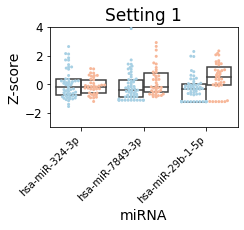

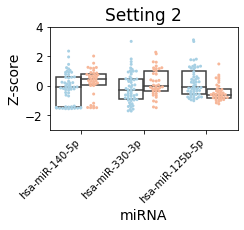

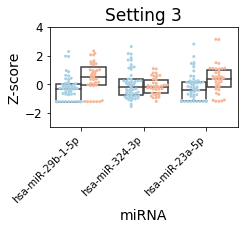

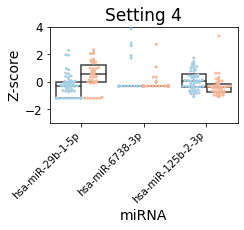

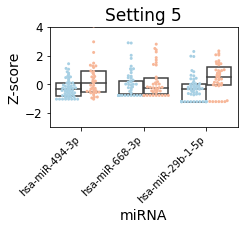

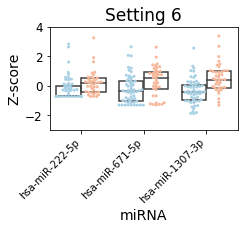

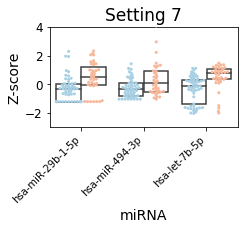

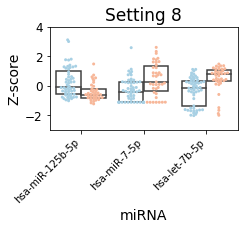

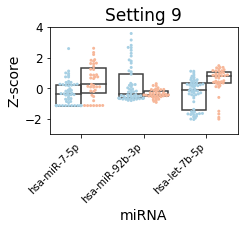

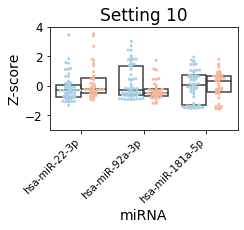

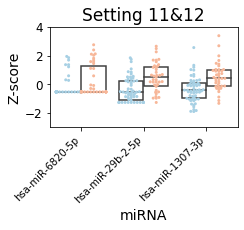

In [58]:
for title, i in miRNA_list.items():
    count = 1
    for lst in i:            
        box_df = X[lst].copy()
        y = data['Class']
        box_df = pd.concat([box_df,y], axis=1)
        box_df = pd.melt(box_df, 'Class', var_name='feature', value_name='value')
        for x in box_df.index:
            if box_df.loc[x,"Class"] == 1:
                box_df.loc[x,"Class"] = "T2DM"
            elif box_df.loc[x,"Class"] == 0:
                box_df.loc[x,"Class"] = "HC"
        box_df = box_df.sort_values(by="Class")
        
        vplot, ax3 = plt.subplots(figsize=(3.5,3.3))    
        vplot = sns.swarmplot(data=box_df, x='feature', y='value', hue='Class', color = ".25", size=3, palette='RdBu_r', dodge=True)
        # plot boxplot
        sns.boxplot(data=box_df, x="feature", y="value", hue='Class', 
                    showcaps=False,             # 박스 상단 가로라인 보이지 않기
                    whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
                    showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
                    boxprops={'facecolor':'None'}, # 박스 색상 지우기
                )
        vplot.legend_.remove()
        vplot = vplot.get_figure()
        ax3.set_title(str(title),fontsize=17)
        ax3.set_ylim([-3, 4])
        plt.yticks(fontsize=12)
        plt.xticks(fontsize=10)
        vplot.autofmt_xdate(rotation=45)
        ax3.set_xlabel('miRNA',fontsize=14)
        ax3.set_ylabel('Z-score',fontsize=14)
        vplot.tight_layout()
        resultdir = "D://Biomarker_discovery//miR_Feature_selection//Figure//Raw//Fig3_DEG//RawFigure"
#         vplot.show()
        vplot.savefig(resultdir + "//Fig3_%s_%d.png" % (title, count), dpi=300)
        count += 1

# log2(RPM+1)

In [18]:
workdir = "D://Biomarker_discovery//miR_Feature_selection//Raw_data"
df_genomic = pd.read_csv(workdir + "//200617_95_samples_miRNA_HC_vs_T2DM_RPM.csv"
                    , index_col = ["id"])
y = df_genomic["Class"] #Class
#X_DN = df_e1.drop(["Class", 'hsa-let-7b-5p', 'hsa-miR-23b-3p', 'hsa-let-7c-5p', 'hsa-miR-30a-3p', 'hsa-miR-200c-3p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-1290'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-1343-3p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-671-3p', 'hsa-miR-3144-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-891a-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
df_genomic = df_genomic.drop(["Class"], axis = 1) #Rest dataseet
# split data train 70 % and test 30 %
#drop and rotate dataset
df_genomic = df_genomic.T[(df_genomic != 0).any()].T

_number_of_samples = len(df_genomic)
_number_of_items = len(df_genomic.columns.to_list())


In [19]:
len(df_genomic)

95

In [20]:

# # encode labels column to numbers
# le = LabelEncoder()
# #get label data by index and Encode items into 0 and 1
# le.fit(df_genomic.iloc[:, _labels.index(_target_label)])
# y = le.transform(df_genomic.iloc[:, _labels.index(_target_label)])
#get data excluding labels
X = df_genomic.iloc[:,]

#Min-Max normalization
# X = (X - X.min())/(X.max()-X.min())

# log2(RPM+1)
X = log2(X+1)
# z-normalization
X = (X - X.mean())/X.std()

#X.to_csv('miR.txt', sep='\t', header=True)

In [21]:
X.head()

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,hsa-miR-95-3p,hsa-miR-95-5p,hsa-miR-9-5p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p
id,,,,,,,,,,,,,,,,,,,,,
SRR5034616,-0.127615,-0.993955,-1.770678,-0.650978,-1.676764,-0.201311,-1.720544,1.503217,-0.903076,0.169255,...,-1.675497,0.571160,-2.111917,0.589015,1.414189,-1.570328,0.035607,-0.738154,-0.172786,-0.722056
SRR5034617,-0.127615,-1.734451,-1.147687,-1.659423,-0.243392,-0.201311,-1.268015,0.761041,-0.628498,-0.011059,...,-1.674726,-0.718575,-1.564170,1.998899,0.324447,-1.200515,-0.581666,-1.537375,-0.775569,-1.235631
SRR5034618,2.613046,0.051104,-0.076818,-0.098983,0.899890,1.851251,1.277836,2.287911,1.349503,2.808616,...,-1.561654,-0.752208,-1.298583,0.831617,2.468198,-0.354375,0.632894,-1.349806,1.890171,0.222421
SRR5034619,-0.127615,-0.431016,-1.261928,0.039772,-1.337421,-0.201311,-1.292624,1.641391,-0.216562,0.624764,...,-1.003622,-0.752208,-1.020474,0.649887,1.743334,-1.270565,-0.253126,-0.619926,-0.502051,-0.924995
SRR5034620,-0.127615,-1.714568,-2.296399,-0.916935,-2.579823,-0.201311,-2.373986,1.041580,-2.214678,-0.024689,...,-1.774507,-0.752208,-1.853404,0.547380,0.640965,-2.306589,-0.140809,-1.266529,-1.138336,-1.768569


In [26]:
_individual_features = ['hsa-let-7b-5p', 'hsa-miR-125b-5p', 'hsa-miR-7-5p']

In [27]:
# 3개 miRNA DEG 양상 출력
data = pd.read_csv(workdir + "//200617_95_samples_miRNA_HC_vs_T2DM_RPM.csv"
                    , index_col = ["id"])

In [28]:
# subplot을 만들고
# 각각의 DE 결과를 창에 입력
# 각 DE plot의 부제목은 Settings # (GA) or Settings # (Traditional methods)
# supplementary figure 에 사용될 그림

miRNA_list = {"Setting 1_ga":[['hsa-miR-29b-1-5p', 'hsa-miR-324-3p', 'hsa-miR-7849-3p']],
            "Setting 2_ga":[['hsa-miR-125b-5p', 'hsa-miR-140-5p', 'hsa-miR-330-3p']],
            "Setting 3_ga":[['hsa-miR-23a-5p', 'hsa-miR-29b-1-5p', 'hsa-miR-324-3p']],
            "Setting 4_ga":[['hsa-miR-125b-2-3p', 'hsa-miR-29b-1-5p', 'hsa-miR-6738-3p']],
            "Setting 5_ga":[['hsa-miR-29b-1-5p', 'hsa-miR-494-3p', 'hsa-miR-668-3p']],
            "Setting 6_ga":[['hsa-miR-1307-3p', 'hsa-miR-222-5p', 'hsa-miR-671-5p']],
            "Setting 7_ga":[['hsa-let-7b-5p', 'hsa-miR-29b-1-5p', 'hsa-miR-494-3p']],
            "Setting 8_ga":[['hsa-let-7b-5p', 'hsa-miR-125b-5p', 'hsa-miR-7-5p']],
            "Setting 9_ga":[['hsa-let-7b-5p', 'hsa-miR-7-5p', 'hsa-miR-92b-3p']],
            "Setting 10_tfs":[['hsa-miR-181a-5p', 'hsa-miR-22-3p', 'hsa-miR-92a-3p']],
            "Setting 11&12_tfs":[['hsa-miR-1307-3p', 'hsa-miR-6820-5p', 'hsa-miR-29b-2-5p']]}




In [29]:
# https://www.delftstack.com/ko/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

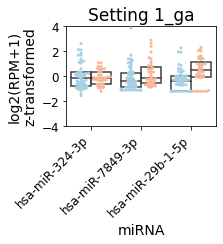

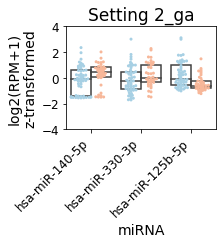

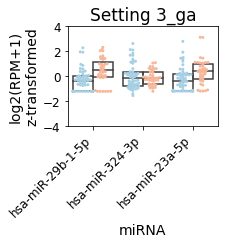

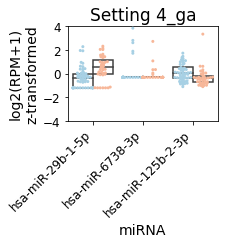

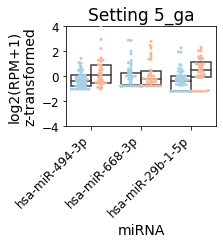

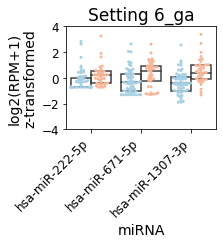

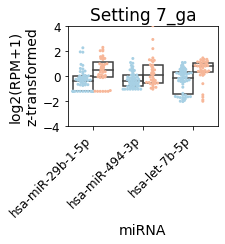

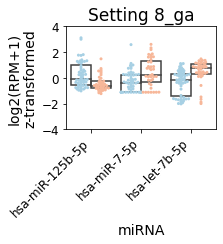

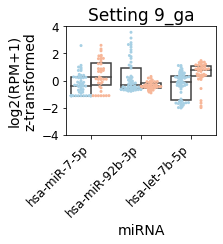

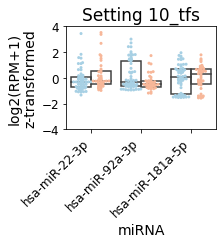

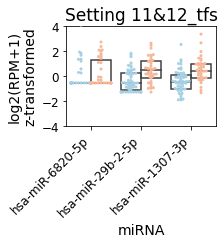

In [32]:
for title, i in miRNA_list.items():
    count = 1
    for lst in i:            
        box_df = X[lst].copy()
        y = data['Class']
        box_df = pd.concat([box_df,y], axis=1)
        box_df = pd.melt(box_df, 'Class', var_name='feature', value_name='value')
        for x in box_df.index:
            if box_df.loc[x,"Class"] == 1:
                box_df.loc[x,"Class"] = "T2DM"
            elif box_df.loc[x,"Class"] == 0:
                box_df.loc[x,"Class"] = "HC"
        box_df = box_df.sort_values(by="Class")
        
        vplot, ax3 = plt.subplots(figsize=(3.2,3.5))    
        vplot = sns.swarmplot(data=box_df, x='feature', y='value', hue='Class', color = ".25", size=3, palette='RdBu_r', dodge=True)
        # plot boxplot
        sns.boxplot(data=box_df, x="feature", y="value", hue='Class', 
                    showcaps=False,             # 박스 상단 가로라인 보이지 않기
                    whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
                    showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
                    boxprops={'facecolor':'None'}, # 박스 색상 지우기
                )
        vplot.legend_.remove()
        vplot = vplot.get_figure()
        ax3.set_title(str(title),fontsize=17)
        ax3.set_ylim([-4, 4])
        plt.yticks(fontsize=12)
        plt.xticks(fontsize=12)
        vplot.autofmt_xdate(rotation=45)
        ax3.set_xlabel('miRNA',fontsize=14)
        ax3.set_ylabel('log2(RPM+1)\nz-transformed',fontsize=14)
        vplot.tight_layout()
        resultdir = "D://Biomarker_discovery//miR_Feature_selection//Figure//Raw//Fig3_DEG//RawFigure"
#         vplot.show()
        vplot.savefig(resultdir + "//Fig3_%s_%d_log2RPM_1_z_trans.png" % (title, count), dpi=300)
        count += 1

In [27]:
lst = []

In [28]:
lst = _individual_features
lst.append("Class")
DE_list = lst
DE_data = data.loc[:,DE_list]

In [29]:
lst

['hsa-let-7b-5p', 'hsa-miR-125b-5p', 'hsa-miR-7-5p', 'Class']

In [30]:
DE_data

,hsa-let-7b-5p,hsa-miR-125b-5p,hsa-miR-7-5p,Class
id,,,,
SRR5034616,572.421088,75.346756,0.000000,1
SRR5034617,1326.064677,23.113801,0.248239,1
SRR5034618,2590.544879,62.010446,0.000000,1
SRR5034619,698.435723,47.057726,0.000000,1
SRR5034620,336.972342,31.199520,0.000000,1
...,...,...,...,...
SRR7412331,1902.688337,52.166058,8.236746,0
SRR7412332,1718.151784,62.178990,61.264593,0
SRR7412333,1836.085884,185.975550,41.252758,0


In [31]:
# p-value
from scipy import stats
for x in DE_data.columns[0:3]:
    tTestResult = stats.ttest_ind(DE_data[DE_data["Class"] == 1][x]
                                  ,DE_data[DE_data["Class"] == 0][x])
    print("P-value of " + x + " = " + str(tTestResult[1]))

P-value of hsa-let-7b-5p = 4.3313438293636536e-05
P-value of hsa-miR-125b-5p = 0.00045907560386622637
P-value of hsa-miR-7-5p = 0.0001749793853877092


In [32]:
FC = DE_data[DE_data["Class"] == 1].mean() / DE_data[DE_data["Class"] == 0].mean()
log2FC = log2(FC)
log2FC

hsa-let-7b-5p      0.467753
hsa-miR-125b-5p   -0.853269
hsa-miR-7-5p       0.952745
Class                   inf
dtype: float64

In [37]:
def fdr(p_vals):

    from scipy.stats import rankdata
    ranked_p_values = rankdata(p_vals)
    fdr = p_vals * len(p_vals) / ranked_p_values
    fdr[fdr > 1] = 1

    return fdr

In [38]:
# p-value
from scipy import stats
miR_id = []
FC = []
p_val = []
for x in data.columns[0:-1]:
    tTestResult = stats.ttest_ind(data[data["Class"] == 1][x]
                                  ,data[data["Class"] == 0][x])
    Fold_Change = data[data["Class"] == 1].mean() / data[data["Class"] == 0].mean()
    print("P-value of " + x + " = " + str(tTestResult[1]))
    miR_id.append(x)
    p_val.append(tTestResult[1])
    FC.append(Fold_Change)

P-value of hsa-let-7a-2-3p = 0.6015250610674348
P-value of hsa-let-7a-3p = 0.3595264839678797
P-value of hsa-let-7a-5p = 0.06741327495753682
P-value of hsa-let-7b-3p = 0.36898880566339265
P-value of hsa-let-7b-5p = 4.3313438293636536e-05
P-value of hsa-let-7c-3p = 0.5886180700567285
P-value of hsa-let-7c-5p = 0.14446368961370964
P-value of hsa-let-7d-3p = 0.12948978323671356
P-value of hsa-let-7d-5p = 0.0005097350078355138
P-value of hsa-let-7e-3p = 0.6967464110723278
P-value of hsa-let-7e-5p = 0.08552235116014514
P-value of hsa-let-7f-1-3p = 0.06547599020684201
P-value of hsa-let-7f-2-3p = 0.728451088192565
P-value of hsa-let-7f-5p = 0.0807254160507244
P-value of hsa-let-7g-3p = 0.568441496057991
P-value of hsa-let-7g-5p = 0.026141051304781192
P-value of hsa-let-7i-3p = 0.005885194215040095
P-value of hsa-let-7i-5p = 0.022522517157281804
P-value of hsa-miR-100-3p = 0.5002864756556655
P-value of hsa-miR-100-5p = 0.09793712486316558
P-value of hsa-miR-101-3p = 0.5562611727068179
P-value

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-103b = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-105-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-105-5p = nan
P-value of hsa-miR-106a-3p = 0.7035413377971189
P-value of hsa-miR-106a-5p = 0.28230193967960626
P-value of hsa-miR-106b-3p = 0.16166455010966235
P-value of hsa-miR-106b-5p = 0.8975014649110951
P-value of hsa-miR-107 = 0.3346456209068681
P-value of hsa-miR-10a-3p = 0.7443559200241172
P-value of hsa-miR-10a-5p = 0.4691876580499358
P-value of hsa-miR-10b-3p = 0.07703776949896349
P-value of hsa-miR-10b-5p = 0.006648616502247213
P-value of hsa-miR-1178-3p = 0.2717046568312867


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1178-5p = nan
P-value of hsa-miR-1179 = 0.23757019974200022
P-value of hsa-miR-1180-3p = 0.183170146909394
P-value of hsa-miR-1180-5p = 0.4298370769550095


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1181 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1182 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1183 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1184 = nan
P-value of hsa-miR-1185-1-3p = 0.0024880192826865297
P-value of hsa-miR-1185-2-3p = 0.7648251639053013
P-value of hsa-miR-1185-5p = 0.23218913165646504
P-value of hsa-miR-1193 = 0.03951669508644655
P-value of hsa-miR-1197 = 0.3558535015614349


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1199-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1199-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1200 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1202 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1203 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1204 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1205 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1206 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1207-3p = nan
P-value of hsa-miR-1207-5p = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1208 = nan
P-value of hsa-miR-122-3p = 0.05151684278397606
P-value of hsa-miR-1224-3p = 0.18420566247217288
P-value of hsa-miR-1224-5p = 0.08175188773140696


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1225-3p = nan
P-value of hsa-miR-1225-5p = 0.40688675021031484
P-value of hsa-miR-122-5p = 0.12289818381276242
P-value of hsa-miR-1226-3p = 0.05512055150694197
P-value of hsa-miR-1226-5p = 0.861433502001955
P-value of hsa-miR-1227-3p = 0.6769713840885551


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1227-5p = nan
P-value of hsa-miR-1228-3p = 0.26377725392974133
P-value of hsa-miR-1228-5p = 0.2490040471896024
P-value of hsa-miR-1229-3p = 0.31495174256814207
P-value of hsa-miR-1229-5p = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1231 = nan
P-value of hsa-miR-1233-3p = 0.2511609857079421


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1233-5p = nan
P-value of hsa-miR-1234-3p = 0.7634787864067343
P-value of hsa-miR-1236-3p = 0.40688675021031484
P-value of hsa-miR-1236-5p = 0.40688675021031484
P-value of hsa-miR-1237-3p = 0.5213352615703628


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1237-5p = nan
P-value of hsa-miR-1238-3p = 0.26613570570022665


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1238-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1243 = nan
P-value of hsa-miR-124-3p = 0.14146890352992045
P-value of hsa-miR-1244 = 0.30685206989245145


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1245a = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1245b-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1245b-5p = nan
P-value of hsa-miR-124-5p = 0.23275958592466814
P-value of hsa-miR-1246 = 0.15513268179630288
P-value of hsa-miR-1247-3p = 0.47056015832955445
P-value of hsa-miR-1247-5p = 0.04710139861947304
P-value of hsa-miR-1248 = 0.3090146620860185
P-value of hsa-miR-1249-3p = 0.028237601218520026
P-value of hsa-miR-1249-5p = 0.675434520696755


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1250-3p = nan
P-value of hsa-miR-1250-5p = 0.9691480464464


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1251-3p = nan
P-value of hsa-miR-1251-5p = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1252-3p = nan
P-value of hsa-miR-1252-5p = 0.6238069951324654


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1253 = nan
P-value of hsa-miR-1254 = 0.5383827392300768
P-value of hsa-miR-1255a = 0.9741395240615304


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1255b-2-3p = nan
P-value of hsa-miR-1255b-5p = 0.7017255984937407
P-value of hsa-miR-1256 = 0.7850103981002969


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1257 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1258 = nan
P-value of hsa-miR-125a-3p = 0.03740940674438779
P-value of hsa-miR-125a-5p = 0.5449041651997111
P-value of hsa-miR-125b-1-3p = 0.16705554684363355
P-value of hsa-miR-125b-2-3p = 0.007430135806508822
P-value of hsa-miR-125b-5p = 0.00045907560386622637
P-value of hsa-miR-1260a = 0.613858179066129
P-value of hsa-miR-1260b = 0.6666571951718681
P-value of hsa-miR-1261 = 0.23844963484860318
P-value of hsa-miR-1262 = 0.3786698385474674


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1263 = nan
P-value of hsa-miR-126-3p = 0.0063864226562308345
P-value of hsa-miR-1264 = 0.10498580418712455


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1265 = nan
P-value of hsa-miR-126-5p = 0.30826405415862285


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1266-3p = nan
P-value of hsa-miR-1266-5p = 0.6961471850111383


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1267 = nan
P-value of hsa-miR-1268a = 0.09909477623527099
P-value of hsa-miR-1268b = 0.08599700447190348
P-value of hsa-miR-1269a = 0.08899338142700802


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1269b = nan
P-value of hsa-miR-1270 = 0.613246437020005
P-value of hsa-miR-1271-3p = 0.6561078758031239
P-value of hsa-miR-1271-5p = 0.4176369511747732


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1272 = nan
P-value of hsa-miR-1273a = 0.12243798829645142
P-value of hsa-miR-1273c = 0.059010587326056796
P-value of hsa-miR-1273d = 0.07002944054256846
P-value of hsa-miR-1273e = 0.3930000049315263
P-value of hsa-miR-1273f = 0.16920334633948156
P-value of hsa-miR-1273g-3p = 0.04880909164702501


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1273g-5p = nan
P-value of hsa-miR-1273h-3p = 0.08062062333804147
P-value of hsa-miR-1273h-5p = 0.5678353937689551
P-value of hsa-miR-127-3p = 0.06307497167326237
P-value of hsa-miR-1275 = 0.9738649143763378
P-value of hsa-miR-127-5p = 0.0208162711019887
P-value of hsa-miR-1276 = 0.16726544154994796
P-value of hsa-miR-1277-3p = 0.37907427647758896
P-value of hsa-miR-1277-5p = 0.12886649358000382
P-value of hsa-miR-1278 = 0.0010848028273043489


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1279 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1281 = nan
P-value of hsa-miR-128-1-5p = 0.08924342667622426


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1282 = nan
P-value of hsa-miR-128-2-5p = 0.18019282899112804
P-value of hsa-miR-1283 = 0.2770885019383455
P-value of hsa-miR-128-3p = 0.15405733467505753
P-value of hsa-miR-1284 = 0.09335076595562804
P-value of hsa-miR-1285-3p = 0.472572612933047
P-value of hsa-miR-1285-5p = 0.5025072888048483
P-value of hsa-miR-1286 = 0.7266047289575597
P-value of hsa-miR-1287-3p = 0.3398942558142629
P-value of hsa-miR-1287-5p = 0.004660698227392293
P-value of hsa-miR-1288-3p = 0.1729615345166758


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1288-5p = nan
P-value of hsa-miR-1289 = 0.4068867502103145
P-value of hsa-miR-1290 = 0.5229598360218095
P-value of hsa-miR-1291 = 0.8277334080265873
P-value of hsa-miR-129-1-3p = 0.5185009358596739
P-value of hsa-miR-1292-3p = 0.5336466704138394
P-value of hsa-miR-129-2-3p = 0.866250369758303
P-value of hsa-miR-1292-5p = 0.6850470181011306


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1293 = nan
P-value of hsa-miR-1294 = 0.9056319886522152
P-value of hsa-miR-1295a = 0.3470321247175705
P-value of hsa-miR-1295b-3p = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1295b-5p = nan
P-value of hsa-miR-129-5p = 0.966140020231839
P-value of hsa-miR-1296-3p = 0.40688675021031484
P-value of hsa-miR-1296-5p = 0.025639590457530278


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1297 = nan
P-value of hsa-miR-1298-3p = 0.4465796040373623
P-value of hsa-miR-1298-5p = 0.5799173418490782
P-value of hsa-miR-1299 = 0.40655921063542977
P-value of hsa-miR-1301-3p = 0.2731493986405218


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1301-5p = nan
P-value of hsa-miR-1302 = 0.915429584806043
P-value of hsa-miR-1303 = 0.18028353472188183
P-value of hsa-miR-1304-3p = 0.9504430549423346
P-value of hsa-miR-1304-5p = 0.28322896106747125


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1305 = nan
P-value of hsa-miR-1306-3p = 0.007306445458327551
P-value of hsa-miR-1306-5p = 0.03285202513600627
P-value of hsa-miR-1307-3p = 6.9252546007315485e-06
P-value of hsa-miR-1307-5p = 0.12868860524412415
P-value of hsa-miR-130a-3p = 0.030407001951963147


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-130a-5p = nan
P-value of hsa-miR-130b-3p = 0.015261156896827308
P-value of hsa-miR-130b-5p = 0.8511790415336853


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1321 = nan
P-value of hsa-miR-1322 = 0.9878196458416822
P-value of hsa-miR-1323 = 0.07141035826382895
P-value of hsa-miR-132-3p = 0.6025551221208565


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1324 = nan
P-value of hsa-miR-132-5p = 0.6929712857531081
P-value of hsa-miR-133a-3p = 0.37389397301983307
P-value of hsa-miR-133a-5p = 0.2524735563401575
P-value of hsa-miR-133b = 0.2632804258381267
P-value of hsa-miR-1343-3p = 0.3205029609158801
P-value of hsa-miR-1343-5p = 0.6730834089393282
P-value of hsa-miR-134-3p = 0.9735748819667033
P-value of hsa-miR-134-5p = 0.03951787169973706
P-value of hsa-miR-135a-3p = 0.8935173569693243
P-value of hsa-miR-135a-5p = 0.8371997251124468
P-value of hsa-miR-135b-3p = 0.26910251638879135
P-value of hsa-miR-135b-5p = 0.673147690399621
P-value of hsa-miR-136-3p = 0.11132058369548674
P-value of hsa-miR-136-5p = 0.10228099447463956
P-value of hsa-miR-137 = 0.232759585924668
P-value of hsa-miR-138-1-3p = 0.4460696459917409
P-value of hsa-miR-138-2-3p = 0.23275958592466814
P-value of hsa-miR-138-5p = 0.3460864992629843
P-value of hsa-miR-139-3p = 0.6332923483177866
P-value of hsa-miR-139-5p = 0.010467608033212812
P-value of hsa-mi

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1468-3p = nan
P-value of hsa-miR-1468-5p = 0.476621188292932
P-value of hsa-miR-1469 = 0.4155483826572486
P-value of hsa-miR-146a-3p = 0.18747008546829474
P-value of hsa-miR-146a-5p = 0.4226173208595013
P-value of hsa-miR-146b-3p = 0.6236402554221674
P-value of hsa-miR-146b-5p = 0.4848685440727476


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1470 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1471 = nan
P-value of hsa-miR-147a = 0.232759585924668
P-value of hsa-miR-147b = 0.6915289103169968
P-value of hsa-miR-148a-3p = 0.4848247136223377
P-value of hsa-miR-148a-5p = 0.10753451485560686
P-value of hsa-miR-148b-3p = 0.09895801785943038
P-value of hsa-miR-148b-5p = 0.0009312408224716507


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-149-3p = nan
P-value of hsa-miR-149-5p = 0.9040997803643913
P-value of hsa-miR-150-3p = 0.31946586195659865
P-value of hsa-miR-150-5p = 0.6059836252194446
P-value of hsa-miR-151a-3p = 0.8587983580642726
P-value of hsa-miR-151a-5p = 0.19988340043221153
P-value of hsa-miR-151b = 0.20281916562723862
P-value of hsa-miR-152-3p = 0.022596127555577286
P-value of hsa-miR-152-5p = 0.2446334725641604
P-value of hsa-miR-153-3p = 0.37104824646419354
P-value of hsa-miR-153-5p = 0.9078854698090458
P-value of hsa-miR-1537-3p = 0.01121088521730545
P-value of hsa-miR-1537-5p = 0.26764238122910244
P-value of hsa-miR-1538 = 0.6424218819314517


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1539 = nan
P-value of hsa-miR-154-3p = 0.2682549733115093
P-value of hsa-miR-154-5p = 0.696185390575859
P-value of hsa-miR-155-3p = 0.08841025644574355
P-value of hsa-miR-155-5p = 0.06787991897078992
P-value of hsa-miR-1587 = 0.27699546324237606
P-value of hsa-miR-15a-3p = 0.2201535488444424
P-value of hsa-miR-15a-5p = 0.10217417931005687
P-value of hsa-miR-15b-3p = 0.32471609253865086
P-value of hsa-miR-15b-5p = 0.0011339382475518568
P-value of hsa-miR-1-5p = 0.40688675021031484
P-value of hsa-miR-16-1-3p = 0.3202828501497106
P-value of hsa-miR-16-2-3p = 0.25458328325189744
P-value of hsa-miR-16-5p = 0.37784529487765617
P-value of hsa-miR-17-3p = 0.10192363039005316
P-value of hsa-miR-17-5p = 0.0010809195078220171
P-value of hsa-miR-181a-2-3p = 0.3003637459305885
P-value of hsa-miR-181a-3p = 0.5515217190722428
P-value of hsa-miR-181a-5p = 0.6445592447039998
P-value of hsa-miR-181b-2-3p = 0.15105231623269766
P-value of hsa-miR-181b-3p = 0.9311921708746738
P-value of 

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1825 = nan
P-value of hsa-miR-182-5p = 0.5099258030511553
P-value of hsa-miR-1827 = 0.6268604888101095
P-value of hsa-miR-183-3p = 0.9674527495492672
P-value of hsa-miR-183-5p = 0.7373391058006955
P-value of hsa-miR-184 = 0.6229948576995481
P-value of hsa-miR-185-3p = 0.01572501621336883
P-value of hsa-miR-185-5p = 0.006594185839300711
P-value of hsa-miR-186-3p = 0.43011150458311276
P-value of hsa-miR-186-5p = 0.25772901398599257
P-value of hsa-miR-187-3p = 0.6537577118375711
P-value of hsa-miR-187-5p = 0.6478530935443965
P-value of hsa-miR-188-3p = 0.11021957107900113
P-value of hsa-miR-188-5p = 0.7239972864645188
P-value of hsa-miR-18a-3p = 0.017502529122844532
P-value of hsa-miR-18a-5p = 0.40879210337236715
P-value of hsa-miR-18b-3p = 0.016919353187540145
P-value of hsa-miR-18b-5p = 0.726772938663458
P-value of hsa-miR-1908-3p = 0.005438518195894459
P-value of hsa-miR-1908-5p = 0.10944549863450412
P-value of hsa-miR-1909-3p = 0.21242183554029945
P-value of hsa-miR

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1915-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1915-5p = nan
P-value of hsa-miR-191-5p = 0.19730297102121475
P-value of hsa-miR-192-3p = 0.8735736580564613
P-value of hsa-miR-192-5p = 0.6904881530017314
P-value of hsa-miR-193a-3p = 0.8520692005950787
P-value of hsa-miR-193a-5p = 0.004272384841952883
P-value of hsa-miR-193b-3p = 0.18187997269259776
P-value of hsa-miR-193b-5p = 0.009848899481881428
P-value of hsa-miR-194-3p = 0.132076105498452
P-value of hsa-miR-194-5p = 0.6519100979089156
P-value of hsa-miR-195-3p = 0.5949839666445673
P-value of hsa-miR-195-5p = 0.27505990630777205
P-value of hsa-miR-196a-3p = 0.3079977745397267
P-value of hsa-miR-196a-5p = 0.0074031569721437
P-value of hsa-miR-196b-3p = 0.0882185032036629
P-value of hsa-miR-196b-5p = 0.06082271700702664
P-value of hsa-miR-1972 = 0.5756836736033926


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-1973 = nan
P-value of hsa-miR-197-3p = 0.44834197952279
P-value of hsa-miR-197-5p = 0.2835799602526895
P-value of hsa-miR-1976 = 0.08187739912102596


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-198 = nan
P-value of hsa-miR-199a-3p = 0.04725243360503419
P-value of hsa-miR-199a-5p = 0.07180068598496687
P-value of hsa-miR-199b-3p = 0.04725243360503419
P-value of hsa-miR-199b-5p = 0.1718706754286865
P-value of hsa-miR-19a-3p = 0.41205607467557215
P-value of hsa-miR-19a-5p = 0.2189896986249546
P-value of hsa-miR-19b-1-5p = 0.044927102890986434


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-19b-2-5p = nan
P-value of hsa-miR-19b-3p = 0.9812436263383185
P-value of hsa-miR-200a-3p = 0.8629851382810301
P-value of hsa-miR-200a-5p = 0.332913306346001
P-value of hsa-miR-200b-3p = 0.7233307288009234
P-value of hsa-miR-200b-5p = 0.9756533445652144
P-value of hsa-miR-200c-3p = 0.0474541739284276
P-value of hsa-miR-200c-5p = 0.9747476300970093
P-value of hsa-miR-202-3p = 0.39384661658059805
P-value of hsa-miR-202-5p = 0.32454326931617805
P-value of hsa-miR-203a-3p = 0.6672420178825831


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-203a-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-203b-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-203b-5p = nan
P-value of hsa-miR-204-3p = 0.2641216630096836
P-value of hsa-miR-204-5p = 0.02792276794732861


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-2052 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-2053 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-205-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-2054 = nan
P-value of hsa-miR-205-5p = 0.004068581460830415
P-value of hsa-miR-206 = 0.301494111646678
P-value of hsa-miR-208a-3p = 0.21450932454770488


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-208a-5p = nan
P-value of hsa-miR-208b-3p = 0.3019528580766352


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-208b-5p = nan
P-value of hsa-miR-20a-3p = 0.12837123158633515
P-value of hsa-miR-20a-5p = 0.01950986239027426
P-value of hsa-miR-20b-3p = 0.7752214827581164
P-value of hsa-miR-20b-5p = 0.25578964218216915
P-value of hsa-miR-210-3p = 0.16945264297621915
P-value of hsa-miR-210-5p = 0.2243540044938558
P-value of hsa-miR-2110 = 0.0031360489181857408
P-value of hsa-miR-2113 = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-211-3p = nan
P-value of hsa-miR-2114-3p = 0.3750876427443195
P-value of hsa-miR-2114-5p = 0.9228228664012843
P-value of hsa-miR-2115-3p = 0.1504768225981481
P-value of hsa-miR-2115-5p = 0.009196142691670966
P-value of hsa-miR-211-5p = 0.8873765382279327
P-value of hsa-miR-2116-3p = 0.004559974480203894
P-value of hsa-miR-2116-5p = 0.2782586167323087


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-2117 = nan
P-value of hsa-miR-212-3p = 0.11068193674672568
P-value of hsa-miR-212-5p = 0.6464338635113929
P-value of hsa-miR-21-3p = 0.05565825377368455
P-value of hsa-miR-214-3p = 0.013839709643311665
P-value of hsa-miR-214-5p = 0.01389086243761899
P-value of hsa-miR-215-3p = 0.4358527951508715
P-value of hsa-miR-215-5p = 0.16026408510424306
P-value of hsa-miR-21-5p = 0.0074723876539757655
P-value of hsa-miR-216a-3p = 0.7090648677611064
P-value of hsa-miR-216a-5p = 0.4132919887421237


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-216b-3p = nan
P-value of hsa-miR-216b-5p = 0.7334402851081736
P-value of hsa-miR-217 = 0.813043425055223


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-218-1-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-218-2-3p = nan
P-value of hsa-miR-218-5p = 0.4891260187787263
P-value of hsa-miR-219a-1-3p = 0.9264050036950838


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-219a-2-3p = nan
P-value of hsa-miR-219a-5p = 0.16863764329653677
P-value of hsa-miR-219b-3p = 0.8772817022824604
P-value of hsa-miR-219b-5p = 0.7421842862665706
P-value of hsa-miR-221-3p = 0.0011312323377124537
P-value of hsa-miR-221-5p = 0.13849899746979782
P-value of hsa-miR-222-3p = 0.01024876406666201
P-value of hsa-miR-222-5p = 0.006245584219584195
P-value of hsa-miR-223-3p = 0.0050914776977582805
P-value of hsa-miR-223-5p = 0.09728201322089575
P-value of hsa-miR-22-3p = 0.06846765801892007
P-value of hsa-miR-224-3p = 0.6187726550011071
P-value of hsa-miR-224-5p = 0.2593310742654488
P-value of hsa-miR-22-5p = 5.367562835129659e-05
P-value of hsa-miR-2276-3p = 0.9707288804711909
P-value of hsa-miR-2276-5p = 0.9262980419919131
P-value of hsa-miR-2277-3p = 0.3384686865701383
P-value of hsa-miR-2277-5p = 0.008472287877507213
P-value of hsa-miR-2278 = 0.7863124239980614
P-value of hsa-miR-2355-3p = 0.3715164730203935
P-value of hsa-miR-2355-5p = 0.20845059780605057
P

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-2682-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-2682-5p = nan
P-value of hsa-miR-26a-1-3p = 0.2352760867506322
P-value of hsa-miR-26a-2-3p = 0.26431924127435
P-value of hsa-miR-26a-5p = 0.18171202466957423
P-value of hsa-miR-26b-3p = 0.19757842790307156
P-value of hsa-miR-26b-5p = 0.01521336521056416
P-value of hsa-miR-27a-3p = 0.0005742621325972566
P-value of hsa-miR-27a-5p = 0.0093711482716637
P-value of hsa-miR-27b-3p = 0.08044550423302853
P-value of hsa-miR-27b-5p = 0.012729561518038968
P-value of hsa-miR-28-3p = 0.8385558606588996
P-value of hsa-miR-28-5p = 0.0604405232707285


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-2861 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-2909 = nan
P-value of hsa-miR-296-3p = 0.8487450789550757
P-value of hsa-miR-296-5p = 0.20429674139611456


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-297 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-298 = nan
P-value of hsa-miR-299-3p = 0.1381768305499962
P-value of hsa-miR-299-5p = 0.968830124922651
P-value of hsa-miR-29a-3p = 0.11626741529866012
P-value of hsa-miR-29a-5p = 0.016646699727540994
P-value of hsa-miR-29b-1-5p = 5.4332625528539076e-05
P-value of hsa-miR-29b-2-5p = 1.5857417524654344e-05
P-value of hsa-miR-29b-3p = 0.053561270350560644
P-value of hsa-miR-29c-3p = 0.2170201476796357
P-value of hsa-miR-29c-5p = 0.19614438205148063


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-300 = nan
P-value of hsa-miR-301a-3p = 0.018108534916192638
P-value of hsa-miR-301a-5p = 0.963691560597366
P-value of hsa-miR-301b-3p = 0.06330972740345177
P-value of hsa-miR-301b-5p = 0.10116800934430405


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-302a-3p = nan
P-value of hsa-miR-302a-5p = 0.2327595859246683


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-302b-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-302b-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-302c-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-302c-5p = nan
P-value of hsa-miR-302d-3p = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-302d-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-302e = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-302f = nan
P-value of hsa-miR-3064-3p = 0.6835814311508881
P-value of hsa-miR-3064-5p = 0.5146179760009504
P-value of hsa-miR-3065-3p = 0.06448730684618482
P-value of hsa-miR-3065-5p = 0.9159931093706569
P-value of hsa-miR-3074-3p = 0.8252700330313825
P-value of hsa-miR-3074-5p = 0.34938354174958075
P-value of hsa-miR-30a-3p = 0.5550805848539189
P-value of hsa-miR-30a-5p = 0.011637608828005831
P-value of hsa-miR-30b-3p = 0.4994212128987432
P-value of hsa-miR-30b-5p = 0.03551830725077345
P-value of hsa-miR-30c-1-3p = 0.23853717792859103
P-value of hsa-miR-30c-2-3p = 0.09129470490572801
P-value of hsa-miR-30c-5p = 0.003308982977889195
P-value of hsa-miR-30d-3p = 0.04677753669317342
P-value of hsa-miR-30d-5p = 0.24247142458641363
P-value of hsa-miR-30e-3p = 0.47186924978453737
P-value of hsa-miR-30e-5p = 0.9314873820832473
P-value of hsa-miR-3115 = 0.2391694903037433
P-value of hsa-miR-3116 = 0.895651038931277
P-value of hsa-miR-3117-3p = 0.9528550827825514


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3117-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3118 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3119 = nan
P-value of hsa-miR-3120-3p = 0.07583184043668173
P-value of hsa-miR-3120-5p = 0.8039298215961227
P-value of hsa-miR-3121-3p = 0.25208082595735837


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3121-5p = nan
P-value of hsa-miR-3122 = 0.05274104847001322


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3123 = nan
P-value of hsa-miR-3124-3p = 0.17634077980529297
P-value of hsa-miR-3124-5p = 0.717917696598431
P-value of hsa-miR-3125 = 0.0694158452223862


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3126-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3126-5p = nan
P-value of hsa-miR-3127-3p = 0.2099854394155516
P-value of hsa-miR-3127-5p = 0.8204967273467405
P-value of hsa-miR-3128 = 0.659404419033556
P-value of hsa-miR-3129-3p = 0.19151445912683315
P-value of hsa-miR-3129-5p = 0.232759585924668
P-value of hsa-miR-3130-3p = 0.2762465208936981
P-value of hsa-miR-3130-5p = 0.296863312813926
P-value of hsa-miR-3131 = 0.3651564426265582


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3132 = nan
P-value of hsa-miR-3133 = 0.2629218697717546
P-value of hsa-miR-3134 = 0.10430057987674986
P-value of hsa-miR-3135a = 0.8584625836147602


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3135b = nan
P-value of hsa-miR-3136-3p = 0.6011988200863188
P-value of hsa-miR-3136-5p = 0.25253243876593257
P-value of hsa-miR-3137 = 0.48779338582136955
P-value of hsa-miR-3138 = 0.5461616162076675
P-value of hsa-miR-3139 = 0.6958990299373736
P-value of hsa-miR-31-3p = 0.0859913303814601
P-value of hsa-miR-3140-3p = 0.8337761189572291
P-value of hsa-miR-3140-5p = 0.04414883731948004
P-value of hsa-miR-3141 = 0.5847456401583639
P-value of hsa-miR-3142 = 0.03782101670997864
P-value of hsa-miR-3143 = 0.2352861666903344
P-value of hsa-miR-3144-3p = 0.05817971435114555
P-value of hsa-miR-3144-5p = 0.8420159528218087


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3145-3p = nan
P-value of hsa-miR-3145-5p = 0.6708314375425442
P-value of hsa-miR-3146 = 0.36802949200552526


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3147 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3148 = nan
P-value of hsa-miR-3149 = 0.9447713413922483
P-value of hsa-miR-3150a-3p = 0.7075261059850669
P-value of hsa-miR-3150a-5p = 0.12116652240334576
P-value of hsa-miR-3150b-3p = 0.9779600402837472
P-value of hsa-miR-3150b-5p = 0.15728313054944704


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3151-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3151-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3152-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3152-5p = nan
P-value of hsa-miR-3153 = 0.232759585924668
P-value of hsa-miR-3154 = 0.607861361731644
P-value of hsa-miR-3155a = 0.8453277845397652
P-value of hsa-miR-3155b = 0.7892824310768174


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3156-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3156-5p = nan
P-value of hsa-miR-3157-3p = 0.01442262391655355
P-value of hsa-miR-3157-5p = 0.1287297224684102
P-value of hsa-miR-3158-3p = 0.03525624851042058
P-value of hsa-miR-3158-5p = 0.7044030990922578
P-value of hsa-miR-3159 = 0.8872838670967831
P-value of hsa-miR-31-5p = 0.38705233839580044
P-value of hsa-miR-3160-3p = 0.5358411596866874
P-value of hsa-miR-3160-5p = 0.40688675021031484
P-value of hsa-miR-3161 = 0.9607557002062628
P-value of hsa-miR-3162-3p = 0.20995573055619807


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3162-5p = nan
P-value of hsa-miR-3163 = 0.5129746126561829
P-value of hsa-miR-3164 = 0.842090722577044
P-value of hsa-miR-3165 = 0.03632395985098362
P-value of hsa-miR-3166 = 0.4722551460861909


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3167 = nan
P-value of hsa-miR-3168 = 0.4752146133967484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3169 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3170 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3171 = nan
P-value of hsa-miR-3173-3p = 0.6314730019414518
P-value of hsa-miR-3173-5p = 0.003005901142567985
P-value of hsa-miR-3174 = 0.7223057879063168
P-value of hsa-miR-3175 = 0.3412675691132936
P-value of hsa-miR-3176 = 0.0028598880424797724
P-value of hsa-miR-3177-3p = 0.8922143925642742
P-value of hsa-miR-3177-5p = 0.5793729383919322


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3178 = nan
P-value of hsa-miR-3179 = 0.7124920191158151
P-value of hsa-miR-3180 = 0.38475561038057815
P-value of hsa-miR-3180-3p = 0.38475561038057815
P-value of hsa-miR-3180-5p = 0.39396277694300996
P-value of hsa-miR-3181 = 0.7840570060679628


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3182 = nan
P-value of hsa-miR-3183 = 0.04652587626068425


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3184-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3184-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3185 = nan
P-value of hsa-miR-3186-3p = 0.006821886869734678
P-value of hsa-miR-3186-5p = 0.23275958592466825
P-value of hsa-miR-3187-3p = 0.6940370177303523
P-value of hsa-miR-3187-5p = 0.23727098014656467
P-value of hsa-miR-3188 = 0.7895918602812172
P-value of hsa-miR-3189-3p = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3189-5p = nan
P-value of hsa-miR-3190-3p = 0.02898310692182888
P-value of hsa-miR-3190-5p = 0.08908686037093971
P-value of hsa-miR-3191-3p = 0.3604015329265142
P-value of hsa-miR-3191-5p = 0.9683510576616974
P-value of hsa-miR-3192-3p = 0.4014978127485077
P-value of hsa-miR-3192-5p = 0.05892824902604191


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3193 = nan
P-value of hsa-miR-3194-3p = 0.08978734763701697
P-value of hsa-miR-3194-5p = 0.10297025699796199
P-value of hsa-miR-3195 = 0.232759585924668
P-value of hsa-miR-3196 = 0.7536645800820082


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3197 = nan
P-value of hsa-miR-3198 = 0.42876965642007814
P-value of hsa-miR-3199 = 0.3478367449040347
P-value of hsa-miR-3200-3p = 0.07284572173958527
P-value of hsa-miR-3200-5p = 0.17745736257323586


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3201 = nan
P-value of hsa-miR-3202 = 0.7335402849449177
P-value of hsa-miR-320a = 0.026867816680280716
P-value of hsa-miR-320b = 0.18536206839633915
P-value of hsa-miR-320c = 0.7823379184448396
P-value of hsa-miR-320d = 0.032084006750582976
P-value of hsa-miR-320e = 0.21887822093224044
P-value of hsa-miR-323a-3p = 0.037787407391917806
P-value of hsa-miR-323a-5p = 0.3925998803372931
P-value of hsa-miR-323b-3p = 0.05809423128510074


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-323b-5p = nan
P-value of hsa-miR-32-3p = 0.20098034653067814
P-value of hsa-miR-324-3p = 0.34847183983278096
P-value of hsa-miR-324-5p = 0.12268360733673474


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-325 = nan
P-value of hsa-miR-32-5p = 0.04133930071079065
P-value of hsa-miR-326 = 0.09601039903642346
P-value of hsa-miR-328-3p = 0.20422495751110337
P-value of hsa-miR-328-5p = 0.08320361684542102
P-value of hsa-miR-329-3p = 0.29621469203348355
P-value of hsa-miR-329-5p = 0.014745630281951366
P-value of hsa-miR-330-3p = 0.07462424601432445
P-value of hsa-miR-330-5p = 0.011045926997951693
P-value of hsa-miR-331-3p = 0.004091959980576785
P-value of hsa-miR-331-5p = 0.03498850700630146
P-value of hsa-miR-335-3p = 0.9279012310392378
P-value of hsa-miR-335-5p = 0.5606777050214007
P-value of hsa-miR-337-3p = 0.09652401777057008
P-value of hsa-miR-337-5p = 0.2026372549478671
P-value of hsa-miR-338-3p = 0.06343877805944281
P-value of hsa-miR-338-5p = 0.2524783547945737
P-value of hsa-miR-339-3p = 0.023382098218400853
P-value of hsa-miR-339-5p = 0.052262769592250076
P-value of hsa-miR-33a-3p = 0.28738505801141306
P-value of hsa-miR-33a-5p = 0.06333848730794081
P-value of hsa

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3529-3p = nan
P-value of hsa-miR-3529-5p = 0.09064524544846138
P-value of hsa-miR-3591-3p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3591-5p = nan
P-value of hsa-miR-3605-3p = 0.017664611901106124
P-value of hsa-miR-3605-5p = 0.02731572108069189


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3606-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3606-5p = nan
P-value of hsa-miR-3607-3p = 0.4259106429523579
P-value of hsa-miR-3607-5p = 0.14181378707654346
P-value of hsa-miR-3609 = 0.370964682651416
P-value of hsa-miR-3610 = 0.005439774592702567
P-value of hsa-miR-3611 = 0.051694451302240874


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3612 = nan
P-value of hsa-miR-3613-3p = 0.212325332870583
P-value of hsa-miR-3613-5p = 0.0006913076842487931
P-value of hsa-miR-361-3p = 0.3449818903115843
P-value of hsa-miR-3614-3p = 0.9417418993370641
P-value of hsa-miR-3614-5p = 0.1037566935936029
P-value of hsa-miR-3615 = 0.04365131085839609
P-value of hsa-miR-361-5p = 0.19946026371637787


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3616-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3616-5p = nan
P-value of hsa-miR-3617-3p = 0.2525187836360195
P-value of hsa-miR-3617-5p = 0.3495291818051879


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3618 = nan
P-value of hsa-miR-3619-3p = 0.40005557598348407
P-value of hsa-miR-3619-5p = 0.27833708839179067
P-value of hsa-miR-3620-3p = 0.8453037422789565
P-value of hsa-miR-3620-5p = 0.42501761367014357


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3621 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3622a-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3622a-5p = nan
P-value of hsa-miR-3622b-3p = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3622b-5p = nan
P-value of hsa-miR-362-3p = 0.5979200893708099
P-value of hsa-miR-362-5p = 0.2532175930352132
P-value of hsa-miR-363-3p = 0.7816335925665014
P-value of hsa-miR-363-5p = 0.218411551719274


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3646 = nan
P-value of hsa-miR-3648 = 0.19514898268476213


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3649 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3650 = nan
P-value of hsa-miR-3651 = 0.2939447403702087
P-value of hsa-miR-3652 = 0.31552578947036625
P-value of hsa-miR-3653-3p = 0.4798124369199115
P-value of hsa-miR-3653-5p = 0.1880058489497668
P-value of hsa-miR-3654 = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3655 = nan
P-value of hsa-miR-3656 = 0.14332044625700055
P-value of hsa-miR-3657 = 0.28825466956089585


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3658 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3659 = nan
P-value of hsa-miR-365a-3p = 0.8437292823198368
P-value of hsa-miR-365a-5p = 0.2633317232252479
P-value of hsa-miR-365b-3p = 0.8437292823198368
P-value of hsa-miR-365b-5p = 0.8700233464359679


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3660 = nan
P-value of hsa-miR-3661 = 0.09264502602741483


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3662 = nan
P-value of hsa-miR-3663-3p = 0.8453574851804434


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3663-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3664-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3664-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3665 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3666 = nan
P-value of hsa-miR-3667-3p = 0.022365107958213778
P-value of hsa-miR-3667-5p = 0.19540899536032968


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3668 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3670 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3671 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3672 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-367-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3674 = nan
P-value of hsa-miR-3675-3p = 0.11283037190662139
P-value of hsa-miR-3675-5p = 0.27872894157178674


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-367-5p = nan
P-value of hsa-miR-3677-3p = 0.5145480601962534
P-value of hsa-miR-3677-5p = 0.08029663951965121
P-value of hsa-miR-3678-3p = 0.5129805436765442
P-value of hsa-miR-3678-5p = 0.18574847038573533
P-value of hsa-miR-3679-3p = 0.35839922663162327
P-value of hsa-miR-3679-5p = 0.3200084833254563


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3680-3p = nan
P-value of hsa-miR-3680-5p = 0.9006624774281181


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3681-3p = nan
P-value of hsa-miR-3681-5p = 0.922548544984048
P-value of hsa-miR-3682-3p = 0.09852811422886217


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3682-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3683 = nan
P-value of hsa-miR-3684 = 0.5245387134202135
P-value of hsa-miR-3685 = 0.480778827307755


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3686 = nan
P-value of hsa-miR-3687 = 0.43857373904252495
P-value of hsa-miR-3688-3p = 0.4944463626446647


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3688-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3689a-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3689a-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3689b-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3689b-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3689c = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3689d = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3689e = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3689f = nan
P-value of hsa-miR-3690 = 0.300156444764517
P-value of hsa-miR-3691-3p = 0.4986449058507211
P-value of hsa-miR-3691-5p = 0.32694931852370246


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3692-3p = nan
P-value of hsa-miR-3692-5p = 0.23275958592466814
P-value of hsa-miR-369-3p = 0.1484618549356225
P-value of hsa-miR-369-5p = 0.19507823952289413
P-value of hsa-miR-370-3p = 0.10781248980256762
P-value of hsa-miR-370-5p = 0.5272601252011486


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3713 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3714 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-371a-3p = nan
P-value of hsa-miR-371a-5p = 0.35288387390782505
P-value of hsa-miR-371b-3p = 0.3203246872623987
P-value of hsa-miR-371b-5p = 0.17931306833623203
P-value of hsa-miR-372-3p = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-372-5p = nan
P-value of hsa-miR-373-3p = 0.42642893919216407


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-373-5p = nan
P-value of hsa-miR-374a-3p = 0.1910541201287161
P-value of hsa-miR-374a-5p = 0.302771085743773
P-value of hsa-miR-374b-3p = 0.1931725696094715
P-value of hsa-miR-374b-5p = 0.06604271419372094
P-value of hsa-miR-374c-3p = 0.0672835871349148
P-value of hsa-miR-374c-5p = 0.022808429742718402
P-value of hsa-miR-375 = 0.012194725900913398
P-value of hsa-miR-376a-2-5p = 0.6363234394105657
P-value of hsa-miR-376a-3p = 0.26245070120319053
P-value of hsa-miR-376a-5p = 0.004593035616958704
P-value of hsa-miR-376b-3p = 0.08634932653282813
P-value of hsa-miR-376b-5p = 0.037960682577961834
P-value of hsa-miR-376c-3p = 0.05311251921851203
P-value of hsa-miR-376c-5p = 0.037960682577961834
P-value of hsa-miR-377-3p = 0.07790335406688348
P-value of hsa-miR-377-5p = 0.05603685276520668
P-value of hsa-miR-378a-3p = 0.43556570169062736
P-value of hsa-miR-378a-5p = 0.5091259325163161
P-value of hsa-miR-378b = 0.7154121622447467
P-value of hsa-miR-378c = 0.22801894441323284
P

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-383-3p = nan
P-value of hsa-miR-383-5p = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-384 = nan
P-value of hsa-miR-3907 = 0.5998746062404194


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3908 = nan
P-value of hsa-miR-3909 = 0.3807254668091795


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3910 = nan
P-value of hsa-miR-3911 = 0.4779570083785123
P-value of hsa-miR-3912-3p = 0.16121098287181643
P-value of hsa-miR-3912-5p = 0.12622873023634734
P-value of hsa-miR-3913-3p = 0.5187087522065403
P-value of hsa-miR-3913-5p = 0.9867203973483666
P-value of hsa-miR-3914 = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3915 = nan
P-value of hsa-miR-3916 = 0.719885067064819
P-value of hsa-miR-3917 = 0.44490531789177046
P-value of hsa-miR-3918 = 0.6360866078059717


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3919 = nan
P-value of hsa-miR-3920 = 0.3900220553262759


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3921 = nan
P-value of hsa-miR-3922-3p = 0.232759585924668
P-value of hsa-miR-3922-5p = 0.3581213517208024
P-value of hsa-miR-3923 = 0.23275958592466792


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3924 = nan
P-value of hsa-miR-3925-3p = 0.493306883689952


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3925-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3926 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3927-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3927-5p = nan
P-value of hsa-miR-3928-3p = 0.06618149347911984
P-value of hsa-miR-3928-5p = 0.7048394637483149


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3929 = nan
P-value of hsa-miR-3934-3p = 0.8699186019630578
P-value of hsa-miR-3934-5p = 0.025218870609362003


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3935 = nan
P-value of hsa-miR-3936 = 0.049613181710794714


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3937 = nan
P-value of hsa-miR-3938 = 0.7770638708537312
P-value of hsa-miR-3939 = 0.0694916421043651
P-value of hsa-miR-3940-3p = 0.7601715466548442
P-value of hsa-miR-3940-5p = 0.5811337513576602
P-value of hsa-miR-3941 = 0.8005795056257445
P-value of hsa-miR-3942-3p = 0.9330632194322576
P-value of hsa-miR-3942-5p = 0.9357100030395874


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3943 = nan
P-value of hsa-miR-3944-3p = 0.4427652083566772
P-value of hsa-miR-3944-5p = 0.49817916301193366
P-value of hsa-miR-3945 = 0.2327595859246683
P-value of hsa-miR-3960 = 0.47427730197120255


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3972 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3973 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3974 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3975 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3976 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3977 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-3978 = nan
P-value of hsa-miR-409-3p = 0.018197630191130278
P-value of hsa-miR-409-5p = 0.5033929746479745
P-value of hsa-miR-410-3p = 0.17972638856089063
P-value of hsa-miR-410-5p = 0.4086047376295625
P-value of hsa-miR-411-3p = 0.3711538638856612
P-value of hsa-miR-411-5p = 0.32198233234723844
P-value of hsa-miR-412-3p = 0.30151073594538563
P-value of hsa-miR-412-5p = 0.6356705685490369
P-value of hsa-miR-421 = 0.5060390247191491
P-value of hsa-miR-422a = 0.6221212214573029
P-value of hsa-miR-423-3p = 0.37420969674726634
P-value of hsa-miR-423-5p = 0.7797335279165404
P-value of hsa-miR-424-3p = 0.8781743753659853
P-value of hsa-miR-424-5p = 0.26243790252052335


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4251 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4252 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4253 = nan
P-value of hsa-miR-425-3p = 0.002427384493168886


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4254 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4255 = nan
P-value of hsa-miR-425-5p = 0.33277571690384256


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4256 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4257 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4258 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4259 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4260 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4261 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4262 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4263 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4264 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4265 = nan
P-value of hsa-miR-4266 = 0.23275958592466814


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4267 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4268 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4269 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4270 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4271 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4272 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4273 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4274 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4275 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4276 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4277 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4278 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4279 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4280 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4281 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4282 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4283 = nan
P-value of hsa-miR-4284 = 0.15957845971457513


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4285 = nan
P-value of hsa-miR-4286 = 0.29220334437854034


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4287 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4288 = nan
P-value of hsa-miR-4289 = 0.23275958592466825
P-value of hsa-miR-429 = 0.6092313541429316


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4290 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4291 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4292 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4293 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4294 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4295 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4296 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4297 = nan
P-value of hsa-miR-4298 = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4299 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4300 = nan
P-value of hsa-miR-4301 = 0.5415301741127818


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4302 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4303 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4304 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4305 = nan
P-value of hsa-miR-4306 = 0.8491056424360911


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4307 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4308 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4309 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4310 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4311 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4312 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4313 = nan
P-value of hsa-miR-431-3p = 0.011765214312066749


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4314 = nan
P-value of hsa-miR-4315 = 0.40688675021031484
P-value of hsa-miR-431-5p = 0.026904061586349694


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4316 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4317 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4318 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4319 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4320 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4321 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4322 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4323 = nan
P-value of hsa-miR-432-3p = 0.6744434854037559


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4324 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4325 = nan
P-value of hsa-miR-432-5p = 0.043777976275543494
P-value of hsa-miR-4326 = 0.032808390689443426


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4327 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4328 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4329 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4330 = nan
P-value of hsa-miR-433-3p = 0.12328760430694326
P-value of hsa-miR-433-5p = 0.989364016018513


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4417 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4418 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4419a = nan
P-value of hsa-miR-4419b = 0.3114365031868007


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4420 = nan
P-value of hsa-miR-4421 = 0.5321365365207273
P-value of hsa-miR-4422 = 0.009365777158249648
P-value of hsa-miR-4423-3p = 0.048232584551546304
P-value of hsa-miR-4423-5p = 0.023457078311244238
P-value of hsa-miR-4424 = 0.4636913761664271
P-value of hsa-miR-4425 = 0.7739168853312791


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4426 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4427 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4428 = nan
P-value of hsa-miR-4429 = 0.05725924418170708
P-value of hsa-miR-4430 = 0.2894260870036217
P-value of hsa-miR-4431 = 0.40688675021031484
P-value of hsa-miR-4432 = 0.23275958592466792
P-value of hsa-miR-4433a-3p = 0.2327595859246683
P-value of hsa-miR-4433a-5p = 0.4175486509118307
P-value of hsa-miR-4433b-3p = 0.06715984892111868
P-value of hsa-miR-4433b-5p = 0.15167977889472603
P-value of hsa-miR-4434 = 0.3894930888143835
P-value of hsa-miR-4435 = 0.05717368616610473
P-value of hsa-miR-4436a = 0.08957020760469012
P-value of hsa-miR-4436b-3p = 0.67615688653446
P-value of hsa-miR-4436b-5p = 0.2737228639498013
P-value of hsa-miR-4437 = 0.5109860449195469


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4438 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4439 = nan
P-value of hsa-miR-4440 = 0.230606682126979


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4441 = nan
P-value of hsa-miR-4442 = 0.016461896172392767
P-value of hsa-miR-4443 = 0.23301063584500442
P-value of hsa-miR-4444 = 0.3543213063918964


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4445-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4445-5p = nan
P-value of hsa-miR-4446-3p = 0.5318894426042151
P-value of hsa-miR-4446-5p = 0.1341517603950257


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4447 = nan
P-value of hsa-miR-4448 = 0.7064993332381395
P-value of hsa-miR-4449 = 0.9475416213456473


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4450 = nan
P-value of hsa-miR-4451 = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4452 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4453 = nan
P-value of hsa-miR-4454 = 0.03218293214567647


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4455 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4456 = nan
P-value of hsa-miR-4457 = 0.5855031988514713


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4458 = nan
P-value of hsa-miR-4459 = 0.15778489831429296


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4460 = nan
P-value of hsa-miR-4461 = 0.8106778257299758


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4462 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4463 = nan
P-value of hsa-miR-4464 = 0.6383839387138731


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4465 = nan
P-value of hsa-miR-4466 = 0.2092170873198729
P-value of hsa-miR-4467 = 0.5713547149950737


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4468 = nan
P-value of hsa-miR-4469 = 0.9469657360304362
P-value of hsa-miR-4470 = 0.32605355315611284


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4471 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4472 = nan
P-value of hsa-miR-4473 = 0.4273453320173868
P-value of hsa-miR-4474-3p = 0.8897232399051803


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4474-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4475 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4476 = nan
P-value of hsa-miR-4477a = 0.006960959636480547
P-value of hsa-miR-4477b = 0.0003714834986332818
P-value of hsa-miR-4478 = 0.5596356596111587
P-value of hsa-miR-4479 = 0.6195133538154561
P-value of hsa-miR-448 = 0.35966943117568007
P-value of hsa-miR-4480 = 0.23275958592466814


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4481 = nan
P-value of hsa-miR-4482-3p = 0.4578999716278419
P-value of hsa-miR-4482-5p = 0.6131465738650992


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4483 = nan
P-value of hsa-miR-4484 = 0.3333758572515494
P-value of hsa-miR-4485-3p = 0.23755749362483553
P-value of hsa-miR-4485-5p = 0.2960665357982608


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4486 = nan
P-value of hsa-miR-4487 = 0.4583006008109588
P-value of hsa-miR-4488 = 0.016121125997749574
P-value of hsa-miR-4489 = 0.6584951874222327


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4490 = nan
P-value of hsa-miR-4491 = 0.4063776327576316
P-value of hsa-miR-4492 = 0.651492382546763


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4493 = nan
P-value of hsa-miR-4494 = 0.26951737793089015


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4495 = nan
P-value of hsa-miR-4496 = 0.9097570398614452


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4497 = nan
P-value of hsa-miR-4498 = 0.058590953583526256
P-value of hsa-miR-4499 = 0.949911166743808
P-value of hsa-miR-449a = 0.8421246651265369
P-value of hsa-miR-449b-3p = 0.13785002751533382
P-value of hsa-miR-449b-5p = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-449c-3p = nan
P-value of hsa-miR-449c-5p = 0.0037386877360753514


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4500 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4501 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4502 = nan
P-value of hsa-miR-4503 = 0.3394986471025532
P-value of hsa-miR-4504 = 0.5528801735301362
P-value of hsa-miR-4505 = 0.5927149498023407


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4506 = nan
P-value of hsa-miR-4507 = 0.7452855023368679
P-value of hsa-miR-4508 = 0.01408553897852298


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4509 = nan
P-value of hsa-miR-450a-1-3p = 0.4587603884698729
P-value of hsa-miR-450a-2-3p = 0.307218263392077
P-value of hsa-miR-450a-5p = 0.011569834149279312
P-value of hsa-miR-450b-3p = 0.9059786546238159
P-value of hsa-miR-450b-5p = 0.011480627779427916
P-value of hsa-miR-4510 = 0.6154160103307118
P-value of hsa-miR-4511 = 0.45590262123620284
P-value of hsa-miR-4512 = 0.6262621287784947
P-value of hsa-miR-4513 = 0.337650177555213


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4514 = nan
P-value of hsa-miR-4515 = 0.76355602185315
P-value of hsa-miR-4516 = 0.016980452605439775


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4517 = nan
P-value of hsa-miR-4518 = 0.05546527380558617
P-value of hsa-miR-4519 = 0.999558593478986
P-value of hsa-miR-451a = 0.10545749904934087
P-value of hsa-miR-451b = 0.40688675021031484
P-value of hsa-miR-4520-2-3p = 0.256556229678829
P-value of hsa-miR-4520-3p = 0.7891902568305877
P-value of hsa-miR-4520-5p = 0.40688675021031484
P-value of hsa-miR-4521 = 0.8067641462968622
P-value of hsa-miR-4522 = 0.37626718457479835
P-value of hsa-miR-4523 = 0.10950385985387068


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-452-3p = nan
P-value of hsa-miR-4524a-3p = 0.5126108577771689
P-value of hsa-miR-4524a-5p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4524b-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4524b-5p = nan
P-value of hsa-miR-4525 = 0.8068787649666291
P-value of hsa-miR-452-5p = 0.2801023509343274
P-value of hsa-miR-4526 = 0.9310124832368365


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4527 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4528 = nan
P-value of hsa-miR-4529-3p = 0.4397278538160765


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4529-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4530 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4531 = nan
P-value of hsa-miR-4532 = 0.019781406751873665
P-value of hsa-miR-4533 = 0.4068867502103145


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4534 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4535 = nan
P-value of hsa-miR-4536-3p = 0.8530215605894504
P-value of hsa-miR-4536-5p = 0.51341849535012
P-value of hsa-miR-4537 = 0.2327595859246683


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4538 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4539 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4540 = nan
P-value of hsa-miR-454-3p = 0.0053383442990427125
P-value of hsa-miR-454-5p = 0.17278344794763772
P-value of hsa-miR-455-3p = 0.6255169481445708
P-value of hsa-miR-455-5p = 0.2511942261298418
P-value of hsa-miR-4632-3p = 0.8005091463137985
P-value of hsa-miR-4632-5p = 0.6973939668342455


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4633-3p = nan
P-value of hsa-miR-4633-5p = 0.4264042692128701


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4634 = nan
P-value of hsa-miR-4635 = 0.8951046992679718
P-value of hsa-miR-4636 = 0.6319387314374725
P-value of hsa-miR-4637 = 0.46873252125377607
P-value of hsa-miR-4638-3p = 0.09672895597250446
P-value of hsa-miR-4638-5p = 0.17407884477798943
P-value of hsa-miR-4639-3p = 0.21736954614887422
P-value of hsa-miR-4639-5p = 0.18658088408097454
P-value of hsa-miR-4640-3p = 0.6187693318172814


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4640-5p = nan
P-value of hsa-miR-4641 = 0.232759585924668
P-value of hsa-miR-4642 = 0.5786526123338851


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4643 = nan
P-value of hsa-miR-4644 = 0.8512403045728332
P-value of hsa-miR-4645-3p = 0.0492958370720413
P-value of hsa-miR-4645-5p = 0.9809815510367113
P-value of hsa-miR-4646-3p = 0.12030009134755575
P-value of hsa-miR-4646-5p = 0.3183148546813458
P-value of hsa-miR-4647 = 0.5643875592832717
P-value of hsa-miR-4648 = 0.1999626516307521
P-value of hsa-miR-4649-3p = 0.2803058389593145
P-value of hsa-miR-4649-5p = 0.4265908838974527


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4650-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4650-5p = nan
P-value of hsa-miR-4651 = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4652-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4652-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4653-3p = nan
P-value of hsa-miR-4653-5p = 0.5378795708995123
P-value of hsa-miR-4654 = 0.3644979415247932


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4655-3p = nan
P-value of hsa-miR-4655-5p = 0.47856042613029814


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4656 = nan
P-value of hsa-miR-4657 = 0.12365466416445636
P-value of hsa-miR-4658 = 0.9254011006746437
P-value of hsa-miR-4659a-3p = 0.4617702098989539
P-value of hsa-miR-4659a-5p = 0.7998103134261099
P-value of hsa-miR-4659b-3p = 0.44822605403115146
P-value of hsa-miR-4659b-5p = 0.15399385066432456


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-466 = nan
P-value of hsa-miR-4660 = 0.1633700194405428
P-value of hsa-miR-4661-3p = 0.8162238440090468
P-value of hsa-miR-4661-5p = 0.8034679110527291
P-value of hsa-miR-4662a-3p = 0.5368003922456204
P-value of hsa-miR-4662a-5p = 0.2603643686842523
P-value of hsa-miR-4662b = 0.07673823497026096
P-value of hsa-miR-4663 = 0.23275958592466814
P-value of hsa-miR-4664-3p = 0.2311390551911449
P-value of hsa-miR-4664-5p = 0.4068867502103145


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4665-3p = nan
P-value of hsa-miR-4665-5p = 0.12649589050037366


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4666a-3p = nan
P-value of hsa-miR-4666a-5p = 0.5251672614093961


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4666b = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4667-3p = nan
P-value of hsa-miR-4667-5p = 0.9517284166817956


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4668-3p = nan
P-value of hsa-miR-4668-5p = 0.6941649322693201
P-value of hsa-miR-4669 = 0.40688675021031484
P-value of hsa-miR-4670-3p = 0.4592798984402048
P-value of hsa-miR-4670-5p = 0.553041009551639
P-value of hsa-miR-4671-3p = 0.7002531124922333
P-value of hsa-miR-4671-5p = 0.4733381775703397
P-value of hsa-miR-4672 = 0.7738087832387105
P-value of hsa-miR-4673 = 0.8068747370528464
P-value of hsa-miR-4674 = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4675 = nan
P-value of hsa-miR-4676-3p = 0.7163584788781494
P-value of hsa-miR-4676-5p = 0.0029178807816105717
P-value of hsa-miR-4677-3p = 0.7743818990504233
P-value of hsa-miR-4677-5p = 0.7058729123335166


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4678 = nan
P-value of hsa-miR-4679 = 0.40688675021031484
P-value of hsa-miR-4680-3p = 0.37169549544587266
P-value of hsa-miR-4680-5p = 0.4821680934444522
P-value of hsa-miR-4681 = 0.23275958592466814
P-value of hsa-miR-4682 = 0.3558187771161406


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4683 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4684-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4684-5p = nan
P-value of hsa-miR-4685-3p = 0.05319635783011816
P-value of hsa-miR-4685-5p = 0.23275958592466814
P-value of hsa-miR-4686 = 0.40688675021031484
P-value of hsa-miR-4687-3p = 0.8795338543549456
P-value of hsa-miR-4687-5p = 0.6612887385236218
P-value of hsa-miR-4688 = 0.5694636615517836
P-value of hsa-miR-4689 = 0.036545774372445744
P-value of hsa-miR-4690-3p = 0.33320715087016173
P-value of hsa-miR-4690-5p = 0.07685645180952341
P-value of hsa-miR-4691-3p = 0.9392000148039297


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4691-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4692 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4693-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4693-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4694-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4694-5p = nan
P-value of hsa-miR-4695-3p = 0.18195440759166165
P-value of hsa-miR-4695-5p = 0.9663724336695743


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4696 = nan
P-value of hsa-miR-4697-3p = 0.29301603584737235


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4697-5p = nan
P-value of hsa-miR-4698 = 0.24099969322664344


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4699-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4699-5p = nan
P-value of hsa-miR-4700-3p = 0.4788648099969598
P-value of hsa-miR-4700-5p = 0.3877722042881062
P-value of hsa-miR-4701-3p = 0.30067203158553146
P-value of hsa-miR-4701-5p = 0.2937893128477141
P-value of hsa-miR-4703-3p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4703-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4704-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4704-5p = nan
P-value of hsa-miR-4705 = 0.14272329180719331
P-value of hsa-miR-4706 = 0.24059193044981825
P-value of hsa-miR-4707-3p = 0.6010087767799728
P-value of hsa-miR-4707-5p = 0.2858810208082578
P-value of hsa-miR-4708-3p = 0.5177062786298373


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4708-5p = nan
P-value of hsa-miR-4709-3p = 0.014292434688814873
P-value of hsa-miR-4709-5p = 0.19532379907293662
P-value of hsa-miR-4710 = 0.1582697737267225


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4711-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4711-5p = nan
P-value of hsa-miR-4712-3p = 0.024907869122764128
P-value of hsa-miR-4712-5p = 0.08957020760469012


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4713-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4713-5p = nan
P-value of hsa-miR-4714-3p = 0.02091731317309358
P-value of hsa-miR-4714-5p = 0.9906988876257168
P-value of hsa-miR-4715-3p = 0.23753155716918084
P-value of hsa-miR-4715-5p = 0.2736589785656878
P-value of hsa-miR-4716-3p = 0.439820545102389
P-value of hsa-miR-4716-5p = 0.23275958592466825
P-value of hsa-miR-4717-3p = 0.6526067623743737
P-value of hsa-miR-4717-5p = 0.7576222866214608


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4718 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4719 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4720-3p = nan
P-value of hsa-miR-4720-5p = 0.090768660050398


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4721 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4722-3p = nan
P-value of hsa-miR-4722-5p = 0.9302753966819775
P-value of hsa-miR-4723-3p = 0.660840904992216
P-value of hsa-miR-4723-5p = 0.9890253486538179
P-value of hsa-miR-4724-3p = 0.4068867502103145
P-value of hsa-miR-4724-5p = 0.94300223465006
P-value of hsa-miR-4725-3p = 0.41714918878962104


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4725-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4726-3p = nan
P-value of hsa-miR-4726-5p = 0.9733718508757737
P-value of hsa-miR-4727-3p = 0.09751755455530722
P-value of hsa-miR-4727-5p = 0.17136069945786378
P-value of hsa-miR-4728-3p = 0.5396102490573691


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4728-5p = nan
P-value of hsa-miR-4729 = 0.7908887101931507
P-value of hsa-miR-4730 = 0.08993191012648101


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4731-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4731-5p = nan
P-value of hsa-miR-4732-3p = 0.008695632281236364
P-value of hsa-miR-4732-5p = 0.5552259359296052
P-value of hsa-miR-4733-3p = 0.4068867502103145


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4733-5p = nan
P-value of hsa-miR-4734 = 0.022369130115345835


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4735-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4735-5p = nan
P-value of hsa-miR-4736 = 0.9047128568144122
P-value of hsa-miR-4737 = 0.8885203584179826
P-value of hsa-miR-4738-3p = 0.8801224365258942


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4738-5p = nan
P-value of hsa-miR-4739 = 0.30762823667346667
P-value of hsa-miR-4740-3p = 0.4068867502103145


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4740-5p = nan
P-value of hsa-miR-4741 = 0.02374722933676869
P-value of hsa-miR-4742-3p = 0.4813211135028225
P-value of hsa-miR-4742-5p = 0.5272841435184965


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4743-3p = nan
P-value of hsa-miR-4743-5p = 0.36818280901697875
P-value of hsa-miR-4744 = 0.7675536017947931
P-value of hsa-miR-4745-3p = 0.7453062879288352
P-value of hsa-miR-4745-5p = 0.9990008766261183


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4746-3p = nan
P-value of hsa-miR-4746-5p = 0.42449741271839236
P-value of hsa-miR-4747-3p = 0.17800695391149338
P-value of hsa-miR-4747-5p = 0.1983771203409263
P-value of hsa-miR-4748 = 0.641738854002184
P-value of hsa-miR-4749-3p = 0.6304337806396098
P-value of hsa-miR-4749-5p = 0.4867934391426755
P-value of hsa-miR-4750-3p = 0.17251972699362333
P-value of hsa-miR-4750-5p = 0.12631507191649596
P-value of hsa-miR-4751 = 0.4384818232380501


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4752 = nan
P-value of hsa-miR-4753-3p = 0.6457562067660336
P-value of hsa-miR-4753-5p = 0.3845890169618654
P-value of hsa-miR-4754 = 0.18968812392873868
P-value of hsa-miR-4755-3p = 0.9312531563878761
P-value of hsa-miR-4755-5p = 0.24356132908497696


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4756-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4756-5p = nan
P-value of hsa-miR-4757-3p = 0.8132659749204391
P-value of hsa-miR-4757-5p = 0.8968076673172393
P-value of hsa-miR-4758-3p = 0.11397178849372813


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4758-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4759 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4760-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4760-5p = nan
P-value of hsa-miR-4761-3p = 0.9613685433075474


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4761-5p = nan
P-value of hsa-miR-4762-3p = 0.13111266138122726
P-value of hsa-miR-4762-5p = 0.01582697998767317
P-value of hsa-miR-4763-3p = 0.40688675021031484
P-value of hsa-miR-4763-5p = 0.5099599454332207


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4764-3p = nan
P-value of hsa-miR-4764-5p = 0.23275958592466825
P-value of hsa-miR-4765 = 0.001524178773414976
P-value of hsa-miR-4766-3p = 0.2886825736639873
P-value of hsa-miR-4766-5p = 0.272277234828539
P-value of hsa-miR-4767 = 0.2707735393643418


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4768-3p = nan
P-value of hsa-miR-4768-5p = 0.40688675021031484
P-value of hsa-miR-4769-3p = 0.025805474761176114
P-value of hsa-miR-4769-5p = 0.19902605567126375


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4770 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4771 = nan
P-value of hsa-miR-4772-3p = 0.9525826101744357
P-value of hsa-miR-4772-5p = 0.6777405705653052
P-value of hsa-miR-4773 = 0.47673691553774555


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4774-3p = nan
P-value of hsa-miR-4774-5p = 0.4898461402167069
P-value of hsa-miR-4775 = 0.9623743679424963


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4776-3p = nan
P-value of hsa-miR-4776-5p = 0.4068867502103145
P-value of hsa-miR-4777-3p = 0.030775856226652677


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4777-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4778-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4778-5p = nan
P-value of hsa-miR-4779 = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4780 = nan
P-value of hsa-miR-4781-3p = 0.2062263766793876
P-value of hsa-miR-4781-5p = 0.24378945446494885
P-value of hsa-miR-4782-3p = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4782-5p = nan
P-value of hsa-miR-4783-3p = 0.25071538318173076


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4783-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4784 = nan
P-value of hsa-miR-4785 = 0.8444256997735946
P-value of hsa-miR-4786-3p = 0.3459649633773608
P-value of hsa-miR-4786-5p = 0.8635397444910349
P-value of hsa-miR-4787-3p = 0.07519542039286559
P-value of hsa-miR-4787-5p = 0.11519693891254408
P-value of hsa-miR-4788 = 0.4419883480929254
P-value of hsa-miR-4789-3p = 0.23275958592466814


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4789-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4790-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4790-5p = nan
P-value of hsa-miR-4791 = 0.7065910242583473
P-value of hsa-miR-4792 = 0.7174345947744886
P-value of hsa-miR-4793-3p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4793-5p = nan
P-value of hsa-miR-4794 = 0.8319442025195304
P-value of hsa-miR-4795-3p = 0.09840253480020107
P-value of hsa-miR-4795-5p = 0.11707528040436736
P-value of hsa-miR-4796-3p = 0.738032747767581
P-value of hsa-miR-4796-5p = 0.09805910769803239
P-value of hsa-miR-4797-3p = 0.41759097731558215
P-value of hsa-miR-4797-5p = 0.22490497071410762


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4798-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4798-5p = nan
P-value of hsa-miR-4799-3p = 0.40688675021031484
P-value of hsa-miR-4799-5p = 0.20805730562796515
P-value of hsa-miR-4800-3p = 0.3569948671207148
P-value of hsa-miR-4800-5p = 0.5213623450988566


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-4801 = nan
P-value of hsa-miR-4802-3p = 0.606363887666199
P-value of hsa-miR-4802-5p = 0.6821314373860177
P-value of hsa-miR-4803 = 0.40688675021031484
P-value of hsa-miR-4804-3p = 0.9581071664941534
P-value of hsa-miR-4804-5p = 0.06478248778588308
P-value of hsa-miR-483-3p = 0.009166644091105545
P-value of hsa-miR-483-5p = 0.12797018236428634
P-value of hsa-miR-484 = 0.28599078969888414
P-value of hsa-miR-485-3p = 0.03593025928704321
P-value of hsa-miR-485-5p = 0.06360586202810553
P-value of hsa-miR-486-3p = 0.0839512310526759
P-value of hsa-miR-486-5p = 0.11545281703568357
P-value of hsa-miR-487a-3p = 0.2748283718848086
P-value of hsa-miR-487a-5p = 0.04542324635979503
P-value of hsa-miR-487b-3p = 0.006687419327240936
P-value of hsa-miR-487b-5p = 0.1489463731515619


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-488-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-488-5p = nan
P-value of hsa-miR-489-3p = 0.07353899051508184


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-489-5p = nan
P-value of hsa-miR-490-3p = 0.020634975871450044
P-value of hsa-miR-490-5p = 0.9856291401729123
P-value of hsa-miR-491-3p = 0.04912167260805669
P-value of hsa-miR-491-5p = 0.2855380847483441


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-492 = nan
P-value of hsa-miR-493-3p = 0.09283985664597848
P-value of hsa-miR-493-5p = 0.1164873924805155
P-value of hsa-miR-494-3p = 0.0010211917458073114
P-value of hsa-miR-494-5p = 0.6682096823204311
P-value of hsa-miR-495-3p = 0.2121605299696185
P-value of hsa-miR-495-5p = 0.6093986518179295
P-value of hsa-miR-496 = 0.2109699755798161
P-value of hsa-miR-497-3p = 0.23275958592466814
P-value of hsa-miR-497-5p = 0.7308891941104556


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-498 = nan
P-value of hsa-miR-4999-3p = 0.7107782600237849
P-value of hsa-miR-4999-5p = 0.20255349614596194
P-value of hsa-miR-499a-3p = 0.5132901976401276
P-value of hsa-miR-499a-5p = 0.22467511954344033
P-value of hsa-miR-499b-3p = 0.232759585924668
P-value of hsa-miR-499b-5p = 0.2953620420486663
P-value of hsa-miR-5000-3p = 0.4573809256516925
P-value of hsa-miR-5000-5p = 0.41953113724893265
P-value of hsa-miR-5001-3p = 0.4931549855005314
P-value of hsa-miR-5001-5p = 0.9618804635180244


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5002-3p = nan
P-value of hsa-miR-5002-5p = 0.23275958592466814
P-value of hsa-miR-5003-3p = 0.41603491327102937
P-value of hsa-miR-5003-5p = 0.8979640364992169
P-value of hsa-miR-5004-3p = 0.545839068549234
P-value of hsa-miR-5004-5p = 0.8186770369069577
P-value of hsa-miR-5006-3p = 0.42537438832652075
P-value of hsa-miR-5006-5p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5007-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5007-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5008-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5008-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5009-3p = nan
P-value of hsa-miR-5009-5p = 0.39530654953204314
P-value of hsa-miR-500a-3p = 0.5477546623365541
P-value of hsa-miR-500a-5p = 0.047319001897965896
P-value of hsa-miR-500b-3p = 0.16352173983781748
P-value of hsa-miR-500b-5p = 0.2774950045992891
P-value of hsa-miR-5010-3p = 0.11233844298882782
P-value of hsa-miR-5010-5p = 0.49003529922699984


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5011-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5011-5p = nan
P-value of hsa-miR-501-3p = 0.8337958576681528
P-value of hsa-miR-501-5p = 0.392995497159928
P-value of hsa-miR-502-3p = 0.44063659131323174
P-value of hsa-miR-502-5p = 0.9606789759190014
P-value of hsa-miR-503-3p = 0.2094057383004509
P-value of hsa-miR-503-5p = 0.4749701332358661
P-value of hsa-miR-504-3p = 0.232759585924668
P-value of hsa-miR-504-5p = 0.26671002781361575


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5047 = nan
P-value of hsa-miR-505-3p = 0.014959834609636234
P-value of hsa-miR-505-5p = 0.6331741364515749
P-value of hsa-miR-506-3p = 0.14649897393363592
P-value of hsa-miR-506-5p = 0.09703273347062101
P-value of hsa-miR-507 = 0.016294997814713257
P-value of hsa-miR-508-3p = 0.12128790391266597
P-value of hsa-miR-508-5p = 0.3052388016931955
P-value of hsa-miR-5087 = 0.8373566812097237


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5088-3p = nan
P-value of hsa-miR-5088-5p = 0.232759585924668
P-value of hsa-miR-5089-3p = 0.27669404670331843
P-value of hsa-miR-5089-5p = 0.232759585924668
P-value of hsa-miR-5090 = 0.8141512141663154
P-value of hsa-miR-5091 = 0.782811653434096
P-value of hsa-miR-5092 = 0.11522966168071151


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5093 = nan
P-value of hsa-miR-509-3-5p = 0.08427359059017904
P-value of hsa-miR-509-3p = 0.21054527828188668
P-value of hsa-miR-5094 = 0.5732274516305581
P-value of hsa-miR-5095 = 0.7219205723267841
P-value of hsa-miR-509-5p = 0.7841039480511773
P-value of hsa-miR-5096 = 0.0022927556158478806
P-value of hsa-miR-5100 = 0.45639790391043455
P-value of hsa-miR-510-3p = 0.9754555890729818
P-value of hsa-miR-510-5p = 0.03976850047051827
P-value of hsa-miR-511-3p = 0.2600756554221729
P-value of hsa-miR-511-5p = 0.014699760369060648
P-value of hsa-miR-512-3p = 0.19240570498496606


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-512-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-513a-3p = nan
P-value of hsa-miR-513a-5p = 0.00843148794066857


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-513b-3p = nan
P-value of hsa-miR-513b-5p = 0.026618671458852806


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-513c-3p = nan
P-value of hsa-miR-513c-5p = 0.05793009632023263
P-value of hsa-miR-514a-3p = 0.13558059124878705
P-value of hsa-miR-514a-5p = 0.8962679118881324
P-value of hsa-miR-514b-3p = 0.2743026863813496


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-514b-5p = nan
P-value of hsa-miR-515-3p = 0.23275958592466825
P-value of hsa-miR-515-5p = 0.36754409193182136


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-516a-3p = nan
P-value of hsa-miR-516a-5p = 0.3853568217356482


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-516b-3p = nan
P-value of hsa-miR-516b-5p = 0.3696198280041749
P-value of hsa-miR-517-5p = 0.23275958592466814
P-value of hsa-miR-517a-3p = 0.26133376505525363
P-value of hsa-miR-517b-3p = 0.26133376505525363
P-value of hsa-miR-517c-3p = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5186 = nan
P-value of hsa-miR-5187-3p = 0.2565143979327128
P-value of hsa-miR-5187-5p = 0.16745302524360636
P-value of hsa-miR-5188 = 0.5416586902116076
P-value of hsa-miR-5189-3p = 0.14271534045467754
P-value of hsa-miR-5189-5p = 0.10448082055865668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-518a-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-518a-5p = nan
P-value of hsa-miR-518b = 0.9847826340188415
P-value of hsa-miR-518c-3p = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-518c-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-518d-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-518d-5p = nan
P-value of hsa-miR-518e-3p = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-518e-5p = nan
P-value of hsa-miR-518f-3p = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-518f-5p = nan
P-value of hsa-miR-5190 = 0.3368650472305639
P-value of hsa-miR-5191 = 0.23275958592466825
P-value of hsa-miR-5192 = 0.10176511823086334
P-value of hsa-miR-5193 = 0.6282483717406813
P-value of hsa-miR-5194 = 0.1522725696549789


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5195-3p = nan
P-value of hsa-miR-5195-5p = 0.9491522429077907
P-value of hsa-miR-5196-3p = 0.06476994720073619


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5196-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5197-3p = nan
P-value of hsa-miR-5197-5p = 0.49559592222151794


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-519a-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-519a-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-519b-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-519b-5p = nan
P-value of hsa-miR-519c-3p = 0.42391724008890663


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-519c-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-519d-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-519d-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-519e-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-519e-5p = nan
P-value of hsa-miR-520a-3p = 0.31384597659938135


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-520a-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-520b = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-520c-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-520c-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-520d-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-520d-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-520e = nan
P-value of hsa-miR-520f-3p = 0.23816151044179362


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-520f-5p = nan
P-value of hsa-miR-520g-3p = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-520g-5p = nan
P-value of hsa-miR-520h = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-521 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-522-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-522-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-523-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-523-5p = nan
P-value of hsa-miR-524-3p = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-524-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-525-3p = nan
P-value of hsa-miR-525-5p = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-526a = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-526b-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-526b-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-527 = nan
P-value of hsa-miR-532-3p = 0.7194060336980916
P-value of hsa-miR-532-5p = 0.6865914846182317
P-value of hsa-miR-539-3p = 0.13337551241452528
P-value of hsa-miR-539-5p = 0.7506506435411121
P-value of hsa-miR-541-3p = 0.07569994626739962
P-value of hsa-miR-541-5p = 0.053064254216152094
P-value of hsa-miR-542-3p = 0.03198507502956669
P-value of hsa-miR-542-5p = 0.9554764169434636
P-value of hsa-miR-543 = 0.31322481978876043
P-value of hsa-miR-544a = 0.16505517168537515
P-value of hsa-miR-544b = 0.2509023014833607
P-value of hsa-miR-545-3p = 0.4298726003148916
P-value of hsa-miR-545-5p = 0.12672530128997478
P-value of hsa-miR-548a-3p = 0.19810706554895485
P-value of hsa-miR-548a-5p = 0.0636493875015824
P-value of hsa-miR-548aa = 0.1336727856770854
P-value of hsa-miR-548ab = 0.5514121642627863
P-value of hsa-miR-548ac = 0.6623628503531568


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-548ad-3p = nan
P-value of hsa-miR-548ad-5p = 0.07723212684295688
P-value of hsa-miR-548ae-3p = 0.7345699681619209
P-value of hsa-miR-548ae-5p = 0.07723212684295688
P-value of hsa-miR-548ag = 0.14210981404205403
P-value of hsa-miR-548ah-3p = 0.14213892808174095
P-value of hsa-miR-548ah-5p = 0.12846567320427293
P-value of hsa-miR-548ai = 0.5678847593347993
P-value of hsa-miR-548aj-3p = 0.08364189910994851
P-value of hsa-miR-548aj-5p = 0.09635140962497601
P-value of hsa-miR-548ak = 0.009104699197746221
P-value of hsa-miR-548al = 0.040361646592619864
P-value of hsa-miR-548am-3p = 0.10521649108413955
P-value of hsa-miR-548am-5p = 0.09440946379009131
P-value of hsa-miR-548an = 0.2881388536635615


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-548ao-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-548ao-5p = nan
P-value of hsa-miR-548ap-3p = 0.11265065279945456
P-value of hsa-miR-548ap-5p = 0.038639631397656166
P-value of hsa-miR-548aq-3p = 0.21101023109996705
P-value of hsa-miR-548aq-5p = 0.714351212429327
P-value of hsa-miR-548ar-3p = 0.9988614673453922
P-value of hsa-miR-548ar-5p = 0.09558400396806482
P-value of hsa-miR-548as-3p = 0.3535190908814635
P-value of hsa-miR-548as-5p = 0.016097521633516302
P-value of hsa-miR-548at-3p = 0.7654421130641852
P-value of hsa-miR-548at-5p = 0.8892298610264358


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-548au-3p = nan
P-value of hsa-miR-548au-5p = 0.05900560370990936
P-value of hsa-miR-548av-3p = 0.01806083940697751
P-value of hsa-miR-548av-5p = 0.350439797145886
P-value of hsa-miR-548aw = 0.055682116505635176
P-value of hsa-miR-548ax = 0.7534993993887577
P-value of hsa-miR-548ay-3p = 0.9165510629268989
P-value of hsa-miR-548ay-5p = 0.06600771308087557
P-value of hsa-miR-548az-3p = 0.7845044687316196
P-value of hsa-miR-548az-5p = 0.13411393545164635
P-value of hsa-miR-548b-3p = 0.4333775078010801
P-value of hsa-miR-548b-5p = 0.39746296031903794
P-value of hsa-miR-548ba = 0.11871040345950398
P-value of hsa-miR-548bb-3p = 0.6960325996979948
P-value of hsa-miR-548bb-5p = 0.12041248885394053
P-value of hsa-miR-548c-3p = 0.20170279415832523
P-value of hsa-miR-548c-5p = 0.09440946379009131
P-value of hsa-miR-548d-3p = 0.007413120157100489
P-value of hsa-miR-548d-5p = 0.04686835072835169
P-value of hsa-miR-548e-3p = 0.3481442332019621
P-value of hsa-miR-548e-5p = 0.8922239

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-553 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-554 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-555 = nan
P-value of hsa-miR-556-3p = 0.4413186052706627
P-value of hsa-miR-556-5p = 0.10023491255914883


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-557 = nan
P-value of hsa-miR-5571-3p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5571-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5572 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5579-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5579-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-558 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5580-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5580-5p = nan
P-value of hsa-miR-5581-3p = 0.5972268331855819
P-value of hsa-miR-5581-5p = 0.232759585924668
P-value of hsa-miR-5582-3p = 0.03624577310302781
P-value of hsa-miR-5582-5p = 0.232759585924668
P-value of hsa-miR-5583-3p = 0.40688675021031484
P-value of hsa-miR-5583-5p = 0.48594138612382687


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5584-3p = nan
P-value of hsa-miR-5584-5p = 0.2842322324734817
P-value of hsa-miR-5585-3p = 0.18517878186071368
P-value of hsa-miR-5585-5p = 0.17028694194212096
P-value of hsa-miR-5586-3p = 0.9200918648442908
P-value of hsa-miR-5586-5p = 0.9219422987986441
P-value of hsa-miR-5587-3p = 0.8376973669120262
P-value of hsa-miR-5587-5p = 0.3087064995075369


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5588-3p = nan
P-value of hsa-miR-5588-5p = 0.8875143463059804


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5589-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5589-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-559 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5590-3p = nan
P-value of hsa-miR-5590-5p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5591-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5591-5p = nan
P-value of hsa-miR-561-3p = 0.23275958592466825
P-value of hsa-miR-561-5p = 0.5344854979737501


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-562 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-563 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-564 = nan
P-value of hsa-miR-566 = 0.38932414819551653


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-567 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-568 = nan
P-value of hsa-miR-5680 = 0.17698071259285925


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5681a = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5681b = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5682 = nan
P-value of hsa-miR-5683 = 0.844892066817198
P-value of hsa-miR-5684 = 0.06873587381319511
P-value of hsa-miR-5685 = 0.232759585924668
P-value of hsa-miR-5687 = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5688 = nan
P-value of hsa-miR-5689 = 0.30044487598147135


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-569 = nan
P-value of hsa-miR-5690 = 0.13011894109926955


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5691 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5692a = nan
P-value of hsa-miR-5692b = 0.603559788922265
P-value of hsa-miR-5692c = 0.603559788922265


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5693 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5694 = nan
P-value of hsa-miR-5695 = 0.17544435877636225
P-value of hsa-miR-5696 = 0.2500955613844807
P-value of hsa-miR-5697 = 0.8796327306642446
P-value of hsa-miR-5698 = 0.5893108645580344


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5699-3p = nan
P-value of hsa-miR-5699-5p = 0.3227975442775478
P-value of hsa-miR-5700 = 0.15390518958793076
P-value of hsa-miR-5701 = 0.3986549777012983


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5702 = nan
P-value of hsa-miR-5703 = 0.40688675021031484
P-value of hsa-miR-570-3p = 0.5708226052907774


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5704 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5705 = nan
P-value of hsa-miR-570-5p = 0.5678847593347993
P-value of hsa-miR-5706 = 0.8082496881851016


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5707 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5708 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-571 = nan
P-value of hsa-miR-572 = 0.23275958592466814
P-value of hsa-miR-573 = 0.16426620896475114


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5739 = nan
P-value of hsa-miR-574-3p = 0.04409619739603368
P-value of hsa-miR-574-5p = 0.009162330890933722


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-575 = nan
P-value of hsa-miR-576-3p = 0.19654299541655934
P-value of hsa-miR-576-5p = 0.30341324319489593
P-value of hsa-miR-577 = 0.7414095290877482


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-578 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-5787 = nan
P-value of hsa-miR-579-3p = 0.7331440443376989
P-value of hsa-miR-579-5p = 0.5620905565389263
P-value of hsa-miR-580-3p = 0.7432639972809486
P-value of hsa-miR-580-5p = 0.8119959589446171
P-value of hsa-miR-581 = 0.16171291338705673
P-value of hsa-miR-582-3p = 0.2159251277227407
P-value of hsa-miR-582-5p = 0.09894908141234768


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-583 = nan
P-value of hsa-miR-584-3p = 0.822829004329971
P-value of hsa-miR-584-5p = 0.29231125515536


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-585-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-585-5p = nan
P-value of hsa-miR-586 = 0.5545752623061617


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-587 = nan
P-value of hsa-miR-588 = 0.4068867502103145
P-value of hsa-miR-589-3p = 0.028366148877875703
P-value of hsa-miR-589-5p = 0.019038733697695293
P-value of hsa-miR-590-3p = 0.05235679944384403
P-value of hsa-miR-590-5p = 0.0662749353185306


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-591 = nan
P-value of hsa-miR-592 = 0.45297671997363187


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-593-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-593-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-595 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-596 = nan
P-value of hsa-miR-597-3p = 0.41864705638963984
P-value of hsa-miR-597-5p = 0.5628327441470943
P-value of hsa-miR-598-3p = 0.2621287621845583
P-value of hsa-miR-598-5p = 0.4442555799250285
P-value of hsa-miR-599 = 0.18423546693240359
P-value of hsa-miR-600 = 0.2452534204768255


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-601 = nan
P-value of hsa-miR-602 = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-603 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-604 = nan
P-value of hsa-miR-605-3p = 0.2583452649768349
P-value of hsa-miR-605-5p = 0.09166613546126132


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-606 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6068 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6069 = nan
P-value of hsa-miR-607 = 0.15743062070430894


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6070 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6071 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6072 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6073 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6074 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6075 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6076 = nan
P-value of hsa-miR-6077 = 0.23275958592466825


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6078 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6079 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-608 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6080 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6081 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6082 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6083 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6084 = nan
P-value of hsa-miR-6085 = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6086 = nan
P-value of hsa-miR-6087 = 0.008986549838028404


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6088 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6089 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-609 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6090 = nan
P-value of hsa-miR-610 = 0.21894289924241248


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-611 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-612 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6124 = nan
P-value of hsa-miR-6125 = 0.1813048958704832
P-value of hsa-miR-6126 = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6127 = nan
P-value of hsa-miR-6128 = 0.24099969322664344
P-value of hsa-miR-6129 = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-613 = nan
P-value of hsa-miR-6130 = 0.8113087339927738
P-value of hsa-miR-6131 = 0.10077941206697966


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6132 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6133 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6134 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-614 = nan
P-value of hsa-miR-615-3p = 0.3319885638850939
P-value of hsa-miR-615-5p = 0.50838868872169
P-value of hsa-miR-616-3p = 0.22547575105939624


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6165 = nan
P-value of hsa-miR-616-5p = 0.08643159870670233


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-617 = nan
P-value of hsa-miR-618 = 0.005721115008415118


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-619-3p = nan
P-value of hsa-miR-619-5p = 0.5818375118582624


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-620 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-621 = nan
P-value of hsa-miR-622 = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-623 = nan
P-value of hsa-miR-624-3p = 0.23214149808043227
P-value of hsa-miR-624-5p = 0.012061395022988907
P-value of hsa-miR-625-3p = 0.025406099927779115
P-value of hsa-miR-625-5p = 0.10806166678275049


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-626 = nan
P-value of hsa-miR-627-3p = 0.1138380516147267
P-value of hsa-miR-627-5p = 0.6909494390337148
P-value of hsa-miR-628-3p = 0.7701015072069637
P-value of hsa-miR-628-5p = 0.0110552790800609
P-value of hsa-miR-629-3p = 0.7718451660113808
P-value of hsa-miR-629-5p = 0.09020431853020329


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-630 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-631 = nan
P-value of hsa-miR-632 = 0.8445316827455172


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-633 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-634 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-635 = nan
P-value of hsa-miR-636 = 0.022855324166515308
P-value of hsa-miR-637 = 0.38594870658385005
P-value of hsa-miR-638 = 0.23275958592466814
P-value of hsa-miR-639 = 0.7449442154547495


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-640 = nan
P-value of hsa-miR-641 = 0.19205907523145346
P-value of hsa-miR-642a-3p = 0.398210496413522
P-value of hsa-miR-642a-5p = 0.08435704317449692
P-value of hsa-miR-642b-3p = 0.7243757995049126
P-value of hsa-miR-642b-5p = 0.6269559745133415
P-value of hsa-miR-643 = 0.8289758576699728


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-644a = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-645 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-646 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-647 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-648 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-649 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6499-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6499-5p = nan
P-value of hsa-miR-650 = 0.15580783030267026
P-value of hsa-miR-6500-3p = 0.8425621468292978


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6500-5p = nan
P-value of hsa-miR-6501-3p = 0.6965094120234548
P-value of hsa-miR-6501-5p = 0.13057091895308934
P-value of hsa-miR-6502-3p = 0.23275958592466814
P-value of hsa-miR-6502-5p = 0.07613311649563884
P-value of hsa-miR-6503-3p = 0.13842070556484234
P-value of hsa-miR-6503-5p = 0.2842667170865994


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6504-3p = nan
P-value of hsa-miR-6504-5p = 0.232759585924668
P-value of hsa-miR-6505-3p = 0.9282730356213192
P-value of hsa-miR-6505-5p = 0.23792384176434025


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6506-3p = nan
P-value of hsa-miR-6506-5p = 0.4704482246249325


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6507-3p = nan
P-value of hsa-miR-6507-5p = 0.23275958592466814
P-value of hsa-miR-6508-3p = 0.2475562455858571
P-value of hsa-miR-6508-5p = 0.9722784661663837
P-value of hsa-miR-6509-3p = 0.17412664159404473
P-value of hsa-miR-6509-5p = 0.0562026029763208
P-value of hsa-miR-6510-3p = 0.4068867502103145


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6510-5p = nan
P-value of hsa-miR-6511a-3p = 0.012397110347933121
P-value of hsa-miR-6511a-5p = 0.23689598886261398
P-value of hsa-miR-6511b-3p = 0.04353446153831997
P-value of hsa-miR-6511b-5p = 0.9460752000370719


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6512-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6512-5p = nan
P-value of hsa-miR-6513-3p = 0.011687379394293332
P-value of hsa-miR-6513-5p = 0.7301659188098079
P-value of hsa-miR-651-3p = 0.23275958592466825
P-value of hsa-miR-6514-3p = 0.5485571381520731
P-value of hsa-miR-6514-5p = 0.2354769328391007


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6515-3p = nan
P-value of hsa-miR-6515-5p = 0.7266602083652498
P-value of hsa-miR-651-5p = 0.5784720479164284
P-value of hsa-miR-6516-3p = 0.2730437662338439
P-value of hsa-miR-6516-5p = 0.2454626773948144
P-value of hsa-miR-652-3p = 0.0032485939210972832
P-value of hsa-miR-652-5p = 0.010764222412854688
P-value of hsa-miR-653-3p = 0.23275958592466825
P-value of hsa-miR-653-5p = 0.8352344476528814
P-value of hsa-miR-654-3p = 0.22729908784315342
P-value of hsa-miR-654-5p = 0.028327549547606565
P-value of hsa-miR-655-3p = 0.8560637026065397
P-value of hsa-miR-655-5p = 0.4990041538886323
P-value of hsa-miR-656-3p = 0.7934360020400214
P-value of hsa-miR-656-5p = 0.47959403362533415


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-657 = nan
P-value of hsa-miR-658 = 0.2061059719160447
P-value of hsa-miR-659-3p = 0.5715417138544148
P-value of hsa-miR-659-5p = 0.41871431815390003
P-value of hsa-miR-660-3p = 0.6434963030631335
P-value of hsa-miR-660-5p = 0.654698174582236
P-value of hsa-miR-661 = 0.4068867502103145


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-662 = nan
P-value of hsa-miR-663a = 0.6502708471842977
P-value of hsa-miR-663b = 0.008394373519263929
P-value of hsa-miR-664a-3p = 0.09335442002481908
P-value of hsa-miR-664a-5p = 0.4303592496948059
P-value of hsa-miR-664b-3p = 0.27790690216846925
P-value of hsa-miR-664b-5p = 0.9887853436469968
P-value of hsa-miR-665 = 0.5401373804827468
P-value of hsa-miR-668-3p = 0.18191871005567922


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-668-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-670-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-670-5p = nan
P-value of hsa-miR-671-3p = 0.09335730369707182


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6715a-3p = nan
P-value of hsa-miR-6715b-3p = 0.5715417138544148


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6715b-5p = nan
P-value of hsa-miR-671-5p = 0.0072277454169744695
P-value of hsa-miR-6716-3p = 0.36056867108272916


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6716-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6717-5p = nan
P-value of hsa-miR-6718-5p = 0.7448479368606091


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6719-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6720-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6720-5p = nan
P-value of hsa-miR-6721-5p = 0.7219469456090966


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6722-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6722-5p = nan
P-value of hsa-miR-6723-5p = 0.07898675532643043
P-value of hsa-miR-6724-5p = 0.24038311434406237
P-value of hsa-miR-6726-3p = 0.22215187552899127
P-value of hsa-miR-6726-5p = 0.23275958592466814
P-value of hsa-miR-6727-3p = 0.13881406920326844
P-value of hsa-miR-6727-5p = 0.4861491748368957


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6728-3p = nan
P-value of hsa-miR-6728-5p = 0.1562572813127873
P-value of hsa-miR-6729-3p = 0.35418192415886907
P-value of hsa-miR-6729-5p = 0.9683780333810923
P-value of hsa-miR-6730-3p = 0.9399677984494653
P-value of hsa-miR-6730-5p = 0.4913228271882022
P-value of hsa-miR-6731-3p = 0.07659307958015009
P-value of hsa-miR-6731-5p = 0.21472774877770115
P-value of hsa-miR-6732-3p = 0.2450410259439646
P-value of hsa-miR-6732-5p = 0.6024018520590163
P-value of hsa-miR-6733-3p = 0.4287045566549471
P-value of hsa-miR-6733-5p = 0.6522683693525686
P-value of hsa-miR-6734-3p = 0.5636386686588362
P-value of hsa-miR-6734-5p = 0.01924143856714603
P-value of hsa-miR-6735-3p = 0.17494595970174195
P-value of hsa-miR-6735-5p = 0.693550823310337
P-value of hsa-miR-6736-3p = 0.4008508758785706
P-value of hsa-miR-6736-5p = 0.10670367871789271
P-value of hsa-miR-6737-3p = 0.04242634036356615


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6737-5p = nan
P-value of hsa-miR-6738-3p = 0.2011963420271059
P-value of hsa-miR-6738-5p = 0.11707484460172556


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6739-3p = nan
P-value of hsa-miR-6739-5p = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6740-3p = nan
P-value of hsa-miR-6740-5p = 0.8175752260746971
P-value of hsa-miR-6741-3p = 0.020282370007258632
P-value of hsa-miR-6741-5p = 0.95026545580558
P-value of hsa-miR-6742-3p = 0.042479452975816706


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6742-5p = nan
P-value of hsa-miR-6743-3p = 0.8960520221360081
P-value of hsa-miR-6743-5p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6744-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6744-5p = nan
P-value of hsa-miR-6745 = 0.4068867502103145
P-value of hsa-miR-6746-3p = 0.7013742741332196


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6746-5p = nan
P-value of hsa-miR-6747-3p = 0.7369862285726422


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6747-5p = nan
P-value of hsa-miR-6748-3p = 0.23275958592466814
P-value of hsa-miR-6748-5p = 0.11283037190662139
P-value of hsa-miR-6749-3p = 0.32313107667993846
P-value of hsa-miR-6749-5p = 0.1047564013551812
P-value of hsa-miR-6750-3p = 0.1690402516180299
P-value of hsa-miR-6750-5p = 0.0778436019897752
P-value of hsa-miR-6751-3p = 0.1324652848115568
P-value of hsa-miR-6751-5p = 0.9260390028571945


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6752-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6752-5p = nan
P-value of hsa-miR-6753-3p = 0.6763291041675388
P-value of hsa-miR-6753-5p = 0.05197063802722636
P-value of hsa-miR-675-3p = 0.3388616130025084
P-value of hsa-miR-6754-3p = 0.730060068512836
P-value of hsa-miR-6754-5p = 0.1806563273866781


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6755-3p = nan
P-value of hsa-miR-6755-5p = 0.5624960681318534
P-value of hsa-miR-675-5p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6756-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6756-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6757-3p = nan
P-value of hsa-miR-6757-5p = 0.40688675021031484
P-value of hsa-miR-6758-3p = 0.23275958592466814
P-value of hsa-miR-6758-5p = 0.17313913562334537


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6759-3p = nan
P-value of hsa-miR-6759-5p = 0.23275958592466814


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6760-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6760-5p = nan
P-value of hsa-miR-6761-3p = 0.32006157098747573
P-value of hsa-miR-6761-5p = 0.8300749318448335
P-value of hsa-miR-6762-3p = 0.16245372461879787
P-value of hsa-miR-6762-5p = 0.232759585924668
P-value of hsa-miR-6763-3p = 0.12768778011770487
P-value of hsa-miR-6763-5p = 0.295139403669978
P-value of hsa-miR-676-3p = 0.17582606714585375
P-value of hsa-miR-6764-3p = 0.3833984538023545
P-value of hsa-miR-6764-5p = 0.9299330288404479


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6765-3p = nan
P-value of hsa-miR-6765-5p = 0.4068867502103146
P-value of hsa-miR-676-5p = 0.09691889401216837
P-value of hsa-miR-6766-3p = 0.143965317842637
P-value of hsa-miR-6766-5p = 0.40688675021031484
P-value of hsa-miR-6767-3p = 0.23275958592466814
P-value of hsa-miR-6767-5p = 0.5182740103844832


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6768-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6768-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6769a-3p = nan
P-value of hsa-miR-6769a-5p = 0.5501382626701472
P-value of hsa-miR-6769b-3p = 0.19990645119793238
P-value of hsa-miR-6769b-5p = 0.43832494607267525
P-value of hsa-miR-6770-3p = 0.03199984915098975
P-value of hsa-miR-6770-5p = 0.11464576156487648
P-value of hsa-miR-6771-3p = 0.2523080255092805
P-value of hsa-miR-6771-5p = 0.17267789503091516
P-value of hsa-miR-6772-3p = 0.39544955805656046
P-value of hsa-miR-6772-5p = 0.2914555369738167


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6773-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6773-5p = nan
P-value of hsa-miR-6774-3p = 0.43858974552756047
P-value of hsa-miR-6774-5p = 0.40474053909247465
P-value of hsa-miR-6775-3p = 0.29047680271785037


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6775-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6776-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6776-5p = nan
P-value of hsa-miR-6777-3p = 0.5795586991930892
P-value of hsa-miR-6777-5p = 0.5804012658637083
P-value of hsa-miR-6778-3p = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6778-5p = nan
P-value of hsa-miR-6779-3p = 0.9276539261354844
P-value of hsa-miR-6779-5p = 0.850426889230056
P-value of hsa-miR-6780a-3p = 0.29208501500660305
P-value of hsa-miR-6780a-5p = 0.518661581368234
P-value of hsa-miR-6780b-3p = 0.232759585924668
P-value of hsa-miR-6780b-5p = 0.4068867502103145
P-value of hsa-miR-6781-3p = 0.26864985245001644
P-value of hsa-miR-6781-5p = 0.07525676802223219
P-value of hsa-miR-6782-3p = 0.14955750660376124
P-value of hsa-miR-6782-5p = 0.2209728187008402
P-value of hsa-miR-6783-3p = 0.7756425034056178
P-value of hsa-miR-6783-5p = 0.8698758208858226
P-value of hsa-miR-6784-3p = 0.2946002311079553
P-value of hsa-miR-6784-5p = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6785-3p = nan
P-value of hsa-miR-6785-5p = 0.16615211112272932
P-value of hsa-miR-6786-3p = 0.529520966028072


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6786-5p = nan
P-value of hsa-miR-6787-3p = 0.038639076835466205
P-value of hsa-miR-6787-5p = 0.42282840731185933
P-value of hsa-miR-6788-3p = 0.671902331512523


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6788-5p = nan
P-value of hsa-miR-6789-3p = 0.232759585924668
P-value of hsa-miR-6789-5p = 0.2216645882080942
P-value of hsa-miR-6790-3p = 0.17674395592658207


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6790-5p = nan
P-value of hsa-miR-6791-3p = 0.8350525255828796
P-value of hsa-miR-6791-5p = 0.6782102669584077


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6792-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6792-5p = nan
P-value of hsa-miR-6793-3p = 0.6049080232442736
P-value of hsa-miR-6793-5p = 0.15964758395254458


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6794-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6794-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6795-3p = nan
P-value of hsa-miR-6795-5p = 0.4068867502103145


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6796-3p = nan
P-value of hsa-miR-6796-5p = 0.5085157648688725
P-value of hsa-miR-6797-3p = 0.42655502641147314
P-value of hsa-miR-6797-5p = 0.6029581588207711
P-value of hsa-miR-6798-3p = 0.9840080001204258
P-value of hsa-miR-6798-5p = 0.23275958592466814
P-value of hsa-miR-6799-3p = 0.4945732528325525
P-value of hsa-miR-6799-5p = 0.45735013247536593
P-value of hsa-miR-6800-3p = 0.17464245477248472
P-value of hsa-miR-6800-5p = 0.7263181646054713
P-value of hsa-miR-6801-3p = 0.28744598553617606
P-value of hsa-miR-6801-5p = 0.40688675021031484
P-value of hsa-miR-6802-3p = 0.10814736412934488
P-value of hsa-miR-6802-5p = 0.08164845433160327
P-value of hsa-miR-6803-3p = 0.7983282995441459
P-value of hsa-miR-6803-5p = 0.2114852472681178
P-value of hsa-miR-6804-3p = 0.9078825510563976
P-value of hsa-miR-6804-5p = 0.7397432346751236
P-value of hsa-miR-6805-3p = 0.232759585924668
P-value of hsa-miR-6805-5p = 0.293284422634348
P-value of hsa-miR-6806-3p = 0.6179073699557279


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6806-5p = nan
P-value of hsa-miR-6807-3p = 0.4068867502103145
P-value of hsa-miR-6807-5p = 0.232759585924668
P-value of hsa-miR-6808-3p = 0.232759585924668


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6808-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6809-3p = nan
P-value of hsa-miR-6809-5p = 0.8084495158891706
P-value of hsa-miR-6810-3p = 0.4316757033850598
P-value of hsa-miR-6810-5p = 0.8634424450555827


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6811-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6811-5p = nan
P-value of hsa-miR-6812-3p = 0.11753693073155497
P-value of hsa-miR-6812-5p = 0.4901731133184545
P-value of hsa-miR-6813-3p = 0.8454129344256686
P-value of hsa-miR-6813-5p = 0.9852519064403813


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6814-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6814-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6815-3p = nan
P-value of hsa-miR-6815-5p = 0.2715290534553251
P-value of hsa-miR-6816-3p = 0.4691558979271766


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6816-5p = nan
P-value of hsa-miR-6817-3p = 0.10087504614614318


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6817-5p = nan
P-value of hsa-miR-6818-3p = 0.0854021437619636
P-value of hsa-miR-6818-5p = 0.03405272614676117
P-value of hsa-miR-6819-3p = 0.07924698690874678
P-value of hsa-miR-6819-5p = 0.6459255723091433
P-value of hsa-miR-6820-3p = 0.38067673221586906
P-value of hsa-miR-6820-5p = 0.040668428544041936


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6821-3p = nan
P-value of hsa-miR-6821-5p = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6822-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6822-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6823-3p = nan
P-value of hsa-miR-6823-5p = 0.232759585924668
P-value of hsa-miR-6824-3p = 0.3456747843456116
P-value of hsa-miR-6824-5p = 0.254840233263114
P-value of hsa-miR-6825-3p = 0.08908686035815978
P-value of hsa-miR-6825-5p = 0.03542875135028054
P-value of hsa-miR-6826-3p = 0.6997986856983696
P-value of hsa-miR-6826-5p = 0.47209677759278235


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6827-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6827-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6828-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6828-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6829-3p = nan
P-value of hsa-miR-6829-5p = 0.23275958592466814


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6830-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6830-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6831-3p = nan
P-value of hsa-miR-6831-5p = 0.2327595859246683
P-value of hsa-miR-6832-3p = 0.23275958592466825
P-value of hsa-miR-6832-5p = 0.6482429794924505
P-value of hsa-miR-6833-3p = 0.6627894175272385
P-value of hsa-miR-6833-5p = 0.7469295467267734


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6834-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6834-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6835-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6835-5p = nan
P-value of hsa-miR-6836-3p = 0.23275958592466814
P-value of hsa-miR-6836-5p = 0.5478119648658228
P-value of hsa-miR-6837-3p = 0.3183209524285122
P-value of hsa-miR-6837-5p = 0.07231706075976023
P-value of hsa-miR-6838-3p = 0.23275958592466825
P-value of hsa-miR-6838-5p = 0.9884005342758142


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6839-3p = nan
P-value of hsa-miR-6839-5p = 0.06045619396194649
P-value of hsa-miR-6840-3p = 0.21934281729748595
P-value of hsa-miR-6840-5p = 0.18748625045819542


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6841-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6841-5p = nan
P-value of hsa-miR-6842-3p = 0.6439568046609123
P-value of hsa-miR-6842-5p = 0.9804682387860663
P-value of hsa-miR-6843-3p = 0.11051750144793246
P-value of hsa-miR-6844 = 0.23275958592466814
P-value of hsa-miR-6845-3p = 0.232759585924668
P-value of hsa-miR-6845-5p = 0.0988920827825702
P-value of hsa-miR-6846-3p = 0.23275958592466825
P-value of hsa-miR-6846-5p = 0.40688675021031484
P-value of hsa-miR-6847-3p = 0.05356537592483124
P-value of hsa-miR-6847-5p = 0.9125552086212161
P-value of hsa-miR-6848-3p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6848-5p = nan
P-value of hsa-miR-6849-3p = 0.46171335059699037


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6849-5p = nan
P-value of hsa-miR-6850-3p = 0.6555901090042511
P-value of hsa-miR-6850-5p = 0.39888040719761697
P-value of hsa-miR-6851-3p = 0.4068867502103145
P-value of hsa-miR-6851-5p = 0.7129437499986793
P-value of hsa-miR-6852-3p = 0.6525578583496926
P-value of hsa-miR-6852-5p = 0.04393832870637478
P-value of hsa-miR-6853-3p = 0.7926843208248234


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6853-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6854-3p = nan
P-value of hsa-miR-6854-5p = 0.19960686790960122
P-value of hsa-miR-6855-3p = 0.42809792603922425
P-value of hsa-miR-6855-5p = 0.8630661176818342
P-value of hsa-miR-6856-3p = 0.45437410792929633


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6856-5p = nan
P-value of hsa-miR-6857-3p = 0.1031377844961852
P-value of hsa-miR-6857-5p = 0.23275958592466825
P-value of hsa-miR-6858-3p = 0.2831742042879928
P-value of hsa-miR-6858-5p = 0.6769280110668325
P-value of hsa-miR-6859-3p = 0.03440517841043412
P-value of hsa-miR-6859-5p = 0.4925001011670057


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6860 = nan
P-value of hsa-miR-6861-3p = 0.4068867502103145
P-value of hsa-miR-6861-5p = 0.7122384455432568
P-value of hsa-miR-6862-3p = 0.15660217927822462
P-value of hsa-miR-6862-5p = 0.6426552143861488


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6863 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6864-3p = nan
P-value of hsa-miR-6864-5p = 0.0036625826956196267
P-value of hsa-miR-6865-3p = 0.3846213698814832
P-value of hsa-miR-6865-5p = 0.7874470335100531
P-value of hsa-miR-6866-3p = 0.948144894845227
P-value of hsa-miR-6866-5p = 0.6088073538015697


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6867-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6867-5p = nan
P-value of hsa-miR-6868-3p = 0.8447497102326166


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6868-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6869-3p = nan
P-value of hsa-miR-6869-5p = 0.34076346347694086


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6870-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6870-5p = nan
P-value of hsa-miR-6871-3p = 0.4293415561458378


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6871-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6872-3p = nan
P-value of hsa-miR-6872-5p = 0.232759585924668
P-value of hsa-miR-6873-3p = 0.020362972092671256
P-value of hsa-miR-6873-5p = 0.19095635935080937
P-value of hsa-miR-6874-3p = 0.032635778223462135


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6874-5p = nan
P-value of hsa-miR-6875-3p = 0.2327595859246683
P-value of hsa-miR-6875-5p = 0.3991947390024092
P-value of hsa-miR-6876-3p = 0.2327595859246683
P-value of hsa-miR-6876-5p = 0.09941250050527554
P-value of hsa-miR-6877-3p = 0.5348333277050658
P-value of hsa-miR-6877-5p = 0.8315140837720787
P-value of hsa-miR-6878-3p = 0.40688675021031484
P-value of hsa-miR-6878-5p = 0.5934739908668127
P-value of hsa-miR-6879-3p = 0.744973602344004


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6879-5p = nan
P-value of hsa-miR-6880-3p = 0.6813994170048983
P-value of hsa-miR-6880-5p = 0.23275958592466825
P-value of hsa-miR-6881-3p = 0.01827086267960519
P-value of hsa-miR-6881-5p = 0.03364913860838582
P-value of hsa-miR-6882-3p = 0.45949997969965184
P-value of hsa-miR-6882-5p = 0.9218784527519567
P-value of hsa-miR-6883-3p = 0.7939609354580779


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6883-5p = nan
P-value of hsa-miR-6884-3p = 0.464677859630261
P-value of hsa-miR-6884-5p = 0.8611773510274701
P-value of hsa-miR-6885-3p = 0.48008876401564105
P-value of hsa-miR-6885-5p = 0.09892796740390707
P-value of hsa-miR-6886-3p = 0.2232690080492836
P-value of hsa-miR-6886-5p = 0.29753816662380983


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6887-3p = nan
P-value of hsa-miR-6887-5p = 0.31360390247442055


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6888-3p = nan
P-value of hsa-miR-6888-5p = 0.2327595859246683
P-value of hsa-miR-6889-3p = 0.4842114295719069
P-value of hsa-miR-6889-5p = 0.18453679216553764


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6890-3p = nan
P-value of hsa-miR-6890-5p = 0.07277414207766762
P-value of hsa-miR-6891-3p = 0.40688675021031484
P-value of hsa-miR-6891-5p = 0.8522036476942942


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6892-3p = nan
P-value of hsa-miR-6892-5p = 0.1390603849235869
P-value of hsa-miR-6893-3p = 0.23275958592466814


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-6893-5p = nan
P-value of hsa-miR-6894-3p = 0.46416538900553383
P-value of hsa-miR-6894-5p = 0.8073043301170344
P-value of hsa-miR-6895-3p = 0.5639721448415942
P-value of hsa-miR-6895-5p = 0.6475477585889652
P-value of hsa-miR-708-3p = 0.6199439546671475
P-value of hsa-miR-708-5p = 0.8459928002417351
P-value of hsa-miR-7106-3p = 0.4068867502103145


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7106-5p = nan
P-value of hsa-miR-7107-3p = 0.232759585924668
P-value of hsa-miR-7107-5p = 0.4068867502103145
P-value of hsa-miR-7108-3p = 0.11711548158183671
P-value of hsa-miR-7108-5p = 0.43808539082042064
P-value of hsa-miR-7109-3p = 0.4048749154929101
P-value of hsa-miR-7109-5p = 0.9505047642499346


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-711 = nan
P-value of hsa-miR-7110-3p = 0.5216277218707999
P-value of hsa-miR-7110-5p = 0.3809308799666121


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7111-3p = nan
P-value of hsa-miR-7111-5p = 0.40688675021031484
P-value of hsa-miR-7112-3p = 0.9213839717755277


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7112-5p = nan
P-value of hsa-miR-7113-3p = 0.23275958592466825
P-value of hsa-miR-7113-5p = 0.9751250585075016
P-value of hsa-miR-7114-3p = 0.715085811414041
P-value of hsa-miR-7114-5p = 0.965785681660269
P-value of hsa-miR-7-1-3p = 0.22270616667165521


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7150 = nan
P-value of hsa-miR-7151-3p = 0.6712810118156318
P-value of hsa-miR-7151-5p = 0.24777413784631738
P-value of hsa-miR-7152-3p = 0.8377269816226052
P-value of hsa-miR-7152-5p = 0.8855544751292527


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7153-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7153-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7154-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7154-5p = nan
P-value of hsa-miR-7155-3p = 0.15474533270472354


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7155-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7156-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7156-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7157-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7157-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7158-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7158-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7159-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7159-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7160-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7160-5p = nan
P-value of hsa-miR-7161-3p = 0.24337881066824116
P-value of hsa-miR-7161-5p = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7162-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7162-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-718 = nan
P-value of hsa-miR-7-2-3p = 0.0029872037844037294
P-value of hsa-miR-744-3p = 0.5132041315144716
P-value of hsa-miR-744-5p = 0.03870605755784612


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7515 = nan
P-value of hsa-miR-758-3p = 0.09238033317958455
P-value of hsa-miR-758-5p = 0.7351844546836268


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-759 = nan
P-value of hsa-miR-7-5p = 0.0001749793853877092
P-value of hsa-miR-760 = 0.38452666243903255


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-761 = nan
P-value of hsa-miR-762 = 0.18951418414398957


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-764 = nan
P-value of hsa-miR-7641 = 0.9691479272204376
P-value of hsa-miR-765 = 0.49603579570351
P-value of hsa-miR-766-3p = 0.3154597461588104
P-value of hsa-miR-766-5p = 0.027864875556926225


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-767-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-767-5p = nan
P-value of hsa-miR-769-3p = 0.5135780100085946
P-value of hsa-miR-769-5p = 0.08928555174271885
P-value of hsa-miR-7702 = 0.4068867502103145
P-value of hsa-miR-7703 = 0.6498349993380067
P-value of hsa-miR-7704 = 0.40365097906539993
P-value of hsa-miR-7705 = 0.035038224438488204
P-value of hsa-miR-770-5p = 0.19383639507825232
P-value of hsa-miR-7706 = 0.4404967407740985
P-value of hsa-miR-7843-3p = 0.02474413789884691


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7843-5p = nan
P-value of hsa-miR-7844-5p = 0.4068867502103145
P-value of hsa-miR-7845-5p = 0.8849630708174532
P-value of hsa-miR-7846-3p = 0.9574483162712037
P-value of hsa-miR-7847-3p = 0.1499362472833581
P-value of hsa-miR-7848-3p = 0.44732098278448507
P-value of hsa-miR-7849-3p = 0.049982181783963346
P-value of hsa-miR-7850-5p = 0.041311799046172694
P-value of hsa-miR-7851-3p = 0.12050009777997418
P-value of hsa-miR-7852-3p = 0.09657172578737679
P-value of hsa-miR-7853-5p = 0.36769657728290595
P-value of hsa-miR-7854-3p = 0.3141495256125249
P-value of hsa-miR-7855-5p = 0.08836637573650684
P-value of hsa-miR-7856-5p = 0.8008001529190364


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7973 = nan
P-value of hsa-miR-7974 = 0.31240639700766093
P-value of hsa-miR-7975 = 0.7526618714746102
P-value of hsa-miR-7976 = 0.594044941802496
P-value of hsa-miR-7977 = 0.5830654885341455


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-7978 = nan
P-value of hsa-miR-802 = 0.4068867502103146


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8052 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8053 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8054 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8055 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8056 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8057 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8058 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8059 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8060 = nan
P-value of hsa-miR-8061 = 0.07277810939836542


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8062 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8063 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8064 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8065 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8066 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8067 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8068 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8069 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8070 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8071 = nan
P-value of hsa-miR-8072 = 0.6516283853949667


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8073 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8074 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8075 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8076 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8077 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8078 = nan
P-value of hsa-miR-8079 = 0.6541307955182094


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8080 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8081 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8082 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8083 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8084 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8085 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8086 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8087 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8088 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-8089 = nan
P-value of hsa-miR-8485 = 0.5530758601721459
P-value of hsa-miR-873-3p = 0.9855538802064114
P-value of hsa-miR-873-5p = 0.6429228173904844
P-value of hsa-miR-874-3p = 0.9953624540444994
P-value of hsa-miR-874-5p = 0.4444283684267232


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-875-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-875-5p = nan
P-value of hsa-miR-876-3p = 0.2806297509951635
P-value of hsa-miR-876-5p = 0.961858560263296
P-value of hsa-miR-877-3p = 0.6625259319833574
P-value of hsa-miR-877-5p = 0.4778093442991964
P-value of hsa-miR-885-3p = 0.16313121671932787
P-value of hsa-miR-885-5p = 0.0026164157570707424
P-value of hsa-miR-887-3p = 0.1750076447009176


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-887-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-888-3p = nan
P-value of hsa-miR-888-5p = 0.2327595859246683
P-value of hsa-miR-889-3p = 0.9472988860112166
P-value of hsa-miR-889-5p = 0.5308846553189649


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-890 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-891a-3p = nan
P-value of hsa-miR-891a-5p = 0.1218569177862714


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-891b = nan
P-value of hsa-miR-892a = 0.40688675021031484


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-892b = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-892c-3p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-892c-5p = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-920 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-921 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-922 = nan


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-924 = nan
P-value of hsa-miR-92a-1-5p = 0.7037896773969212
P-value of hsa-miR-92a-2-5p = 0.16507470305162655
P-value of hsa-miR-92a-3p = 0.008342561251746278
P-value of hsa-miR-92b-3p = 0.0024269679478068316
P-value of hsa-miR-92b-5p = 0.9168846942438996
P-value of hsa-miR-933 = 0.04347276346504572
P-value of hsa-miR-93-3p = 0.6765275193942437


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-934 = nan
P-value of hsa-miR-935 = 0.961741087191986
P-value of hsa-miR-93-5p = 0.02803120011634289


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-936 = nan
P-value of hsa-miR-937-3p = 0.12711616777755674
P-value of hsa-miR-937-5p = 0.19599172230690262


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-938 = nan
P-value of hsa-miR-939-3p = 0.043748075356651865
P-value of hsa-miR-939-5p = 0.27806711548304286
P-value of hsa-miR-9-3p = 0.7205773917404283
P-value of hsa-miR-940 = 0.18856629660709887
P-value of hsa-miR-941 = 0.6580848709766494
P-value of hsa-miR-942-3p = 0.15829852679804868
P-value of hsa-miR-942-5p = 0.8342461509264255
P-value of hsa-miR-943 = 0.18290406764477046
P-value of hsa-miR-944 = 0.3001564166436423


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-9500 = nan
P-value of hsa-miR-95-3p = 0.046994752832992086
P-value of hsa-miR-95-5p = 0.9479812105226663
P-value of hsa-miR-9-5p = 0.003132556511387443


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


P-value of hsa-miR-96-3p = nan
P-value of hsa-miR-96-5p = 0.6699579502874555
P-value of hsa-miR-98-3p = 0.36676550824133936
P-value of hsa-miR-98-5p = 0.17246483327005793
P-value of hsa-miR-99a-3p = 0.44296663341136
P-value of hsa-miR-99a-5p = 0.014349167063502434
P-value of hsa-miR-99b-3p = 0.06451723043613218
P-value of hsa-miR-99b-5p = 0.38711321773590734


In [64]:
FC[0][:-1]

hsa-let-7a-2-3p    0.352540
hsa-let-7a-3p      1.109189
hsa-let-7a-5p      1.243203
hsa-let-7b-3p      0.924821
hsa-let-7b-5p      1.382954
                     ...   
hsa-miR-98-5p      1.216212
hsa-miR-99a-3p     0.761216
hsa-miR-99a-5p     0.584093
hsa-miR-99b-3p     1.373964
hsa-miR-99b-5p     1.176828
Length: 2588, dtype: float64

In [80]:
df_pval = pd.DataFrame({"miR":miR_id,"FoldChange":FC[0][:-1],"p-value":p_val})
sort_df_pval = df_pval.sort_values(by="p-value",axis=0)
sort_df_pval.to_csv(workdir +"//210504_miR_FC_pval.csv")

In [138]:
FC = DE_data[DE_data["Class"] == 1].mean() / DE_data[DE_data["Class"] == 0].mean()
log2FC = log2(FC)
log2FC

hsa-let-7b-5p      0.467753
hsa-miR-125b-5p   -0.853269
hsa-miR-7-5p       0.952745
Class                   inf
dtype: float64

In [88]:
# 3개 miRNA DEG 양상 출력
workdir = "D://Biomarker_discovery//miR_Feature_selection//Raw_data"
data = pd.read_csv(workdir + "//200617_95_samples_miRNA_HC_vs_T2DM_RPM.csv"
                    , index_col = ["id"])

In [89]:
# subplot을 만들고
# 각각의 DE 결과를 창에 입력
# 각 DE plot의 부제목은 Settings # (GA) or Settings # (Traditional methods)
# supplementary figure 에 사용될 그림

miRNA_list = {"Setting 1_ga":[['hsa-miR-29b-1-5p', 'hsa-miR-324-3p', 'hsa-miR-7849-3p']],
            "Setting 2_ga":[['hsa-miR-125b-5p', 'hsa-miR-140-5p', 'hsa-miR-330-3p']],
            "Setting 3_ga":[['hsa-miR-23a-5p', 'hsa-miR-29b-1-5p', 'hsa-miR-324-3p']],
            "Setting 4_ga":[['hsa-miR-125b-2-3p', 'hsa-miR-29b-1-5p', 'hsa-miR-6738-3p']],
            "Setting 5_ga":[['hsa-miR-29b-1-5p', 'hsa-miR-494-3p', 'hsa-miR-668-3p']],
            "Setting 6_ga":[['hsa-miR-1307-3p', 'hsa-miR-222-5p', 'hsa-miR-671-5p']],
            "Setting 7_ga":[['hsa-let-7b-5p', 'hsa-miR-29b-1-5p', 'hsa-miR-494-3p']],
            "Setting 8_ga":[['hsa-let-7b-5p', 'hsa-miR-125b-5p', 'hsa-miR-7-5p']],
            "Setting 9_ga":[['hsa-let-7b-5p', 'hsa-miR-7-5p', 'hsa-miR-92b-3p']],
            "Setting 10_tfs":[['hsa-miR-181a-5p', 'hsa-miR-22-3p', 'hsa-miR-92a-3p']],
            "Setting 11&12_tfs":[['hsa-miR-1307-3p', 'hsa-miR-6820-5p', 'hsa-miR-29b-2-5p']]}




In [90]:
# 0: Healthy control 1: T2DM
box_df = data[lst].copy()
X = box_df
# X = (X - X.mean())/X.std()
box_df = X
box_df['Class'] = y
box_df = pd.melt(box_df, 'Class', var_name='feature', value_name='value')

In [98]:
box_df['value'] = log2(box_df['value'] + 1)

In [99]:
for x in box_df.index:
    if box_df.loc[x,"Class"] == 1:
        box_df.loc[x,"Class"] = "T2DM"
    elif box_df.loc[x,"Class"] == 0:
        box_df.loc[x,"Class"] = "HC"

In [100]:
box_df = box_df.sort_values(by="Class")

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


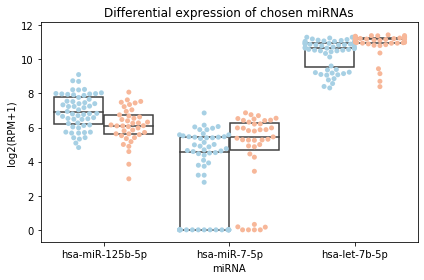

In [102]:
vplot, ax3 = plt.subplots()    
vplot = sns.swarmplot(data=box_df, x='feature', y='value', hue='Class', color = ".25", palette='RdBu_r', dodge=True)
# plot boxplot
sns.boxplot(data=box_df, x="feature", y="value", hue='Class', 
            showcaps=False,             # 박스 상단 가로라인 보이지 않기
            whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
            showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
            boxprops={'facecolor':'None'}, # 박스 색상 지우기
        )
vplot.legend_.remove()
vplot = vplot.get_figure()
ax3.set_title("Differential expression of chosen miRNAs")
# ax3.set_xlim([-0.05, 1.05])
# ax3.set_ylim([-0.05, 1.05])
ax3.set_xlabel('miRNA')
ax3.set_ylabel('log2(RPM+1)')
vplot.tight_layout()
vplot.show()
# vplot.savefig(workdir + "//TF_ANOVA_F_RF_Znorm_vplot.png", dpi=300)

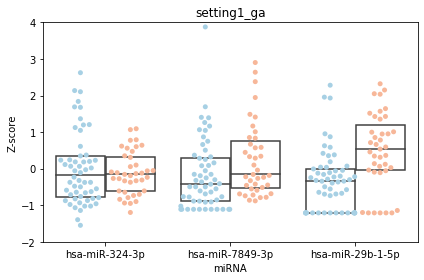

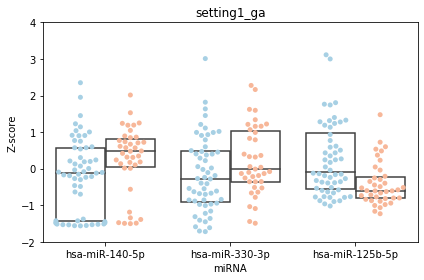

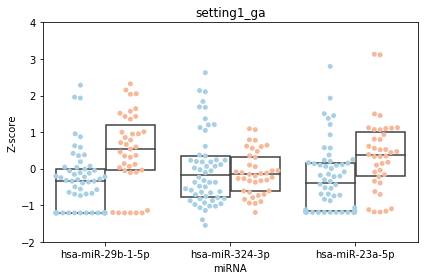

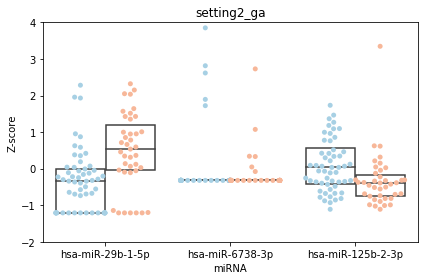

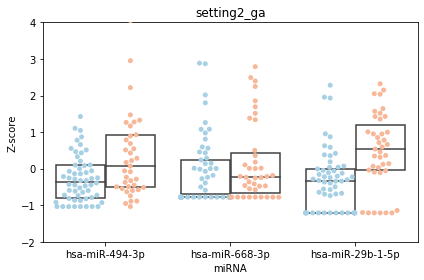

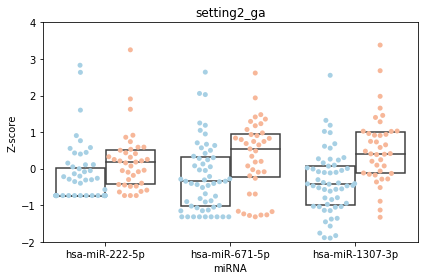

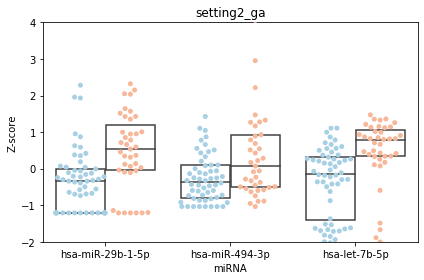

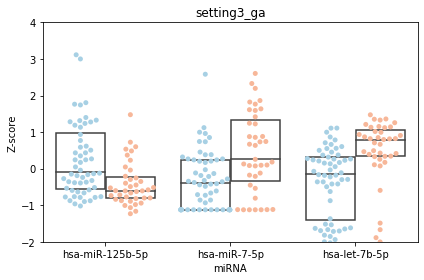

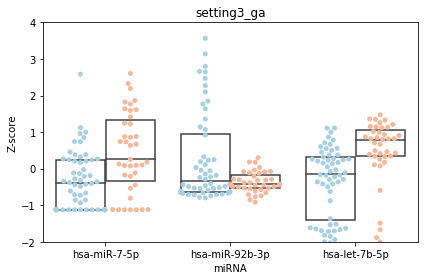

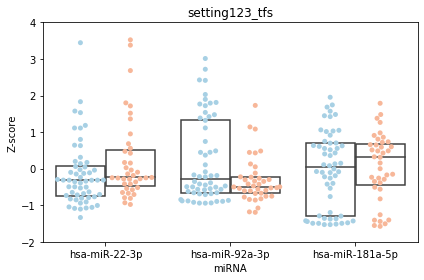

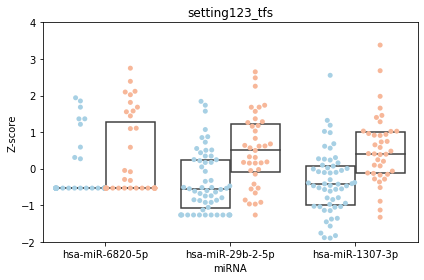

In [40]:
for title, i in miRNA_list.items():
    count = 1
    for lst in i:            
        box_df = data[lst].copy()
        X = box_df
        X = (X - X.mean())/X.std()
        box_df = X
        box_df['Class'] = y
        box_df = pd.melt(box_df, 'Class', var_name='feature', value_name='value')
        for x in box_df.index:
            if box_df.loc[x,"Class"] == 1:
                box_df.loc[x,"Class"] = "T2DM"
            elif box_df.loc[x,"Class"] == 0:
                box_df.loc[x,"Class"] = "HC"
        box_df = box_df.sort_values(by="Class")
        
        vplot, ax3 = plt.subplots()    
        vplot = sns.swarmplot(data=box_df, x='feature', y='value', hue='Class', color = ".25", palette='RdBu_r', dodge=True)
        # plot boxplot
        sns.boxplot(data=box_df, x="feature", y="value", hue='Class', 
                    showcaps=False,             # 박스 상단 가로라인 보이지 않기
                    whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
                    showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
                    boxprops={'facecolor':'None'}, # 박스 색상 지우기
                )
        vplot.legend_.remove()
        vplot = vplot.get_figure()
        ax3.set_title(str(title))
        ax3.set_ylim([-2, 4])
        ax3.set_xlabel('miRNA')
        ax3.set_ylabel('Z-score')
        vplot.tight_layout()
        workdir = "D://miR_Rank_Feautre_selection//Result//RawFigure"
#         vplot.show()
        vplot.savefig(workdir + "//Fig3_Supple_fig_%s_%d.png" % (title, count), dpi=300)
        count += 1

In [18]:
# 0: Healthy control 1: T2DM
box_df = data[lst].copy()
X = box_df
X = (X - X.mean())/X.std()
box_df = X
box_df['Class'] = y
box_df = pd.melt(box_df, 'Class', var_name='feature', value_name='value')

NameError: name 'lst' is not defined

In [48]:
box_df

,Class,feature,value
0,1,hsa-miR-1307-3p,-0.065466
1,1,hsa-miR-1307-3p,-0.890203
2,1,hsa-miR-1307-3p,3.380340
3,1,hsa-miR-1307-3p,0.479604
4,1,hsa-miR-1307-3p,-1.131421
...,...,...,...
280,0,hsa-miR-29b-2-5p,-0.599533
281,0,hsa-miR-29b-2-5p,0.511132
282,0,hsa-miR-29b-2-5p,0.048117
283,0,hsa-miR-29b-2-5p,-0.511313


In [49]:
for x in box_df.index:
    if box_df.loc[x,"Class"] == 1:
        box_df.loc[x,"Class"] = "T2DM"
    elif box_df.loc[x,"Class"] == 0:
        box_df.loc[x,"Class"] = "HC"

In [50]:
box_df = box_df.sort_values(by="Class")

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


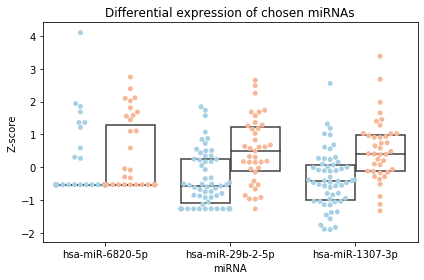

In [51]:
vplot, ax3 = plt.subplots()    
vplot = sns.swarmplot(data=box_df, x='feature', y='value', hue='Class', color = ".25", palette='RdBu_r', dodge=True)
# plot boxplot
sns.boxplot(data=box_df, x="feature", y="value", hue='Class', 
            showcaps=False,             # 박스 상단 가로라인 보이지 않기
            whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
            showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
            boxprops={'facecolor':'None'}, # 박스 색상 지우기
        )
vplot.legend_.remove()
vplot = vplot.get_figure()
ax3.set_title("Differential expression of chosen miRNAs")
# ax3.set_xlim([-0.05, 1.05])
# ax3.set_ylim([-0.05, 1.05])
ax3.set_xlabel('miRNA')
ax3.set_ylabel('Z-score')
vplot.tight_layout()
workdir = "D://miR_Rank_Feautre_selection//Result//RawFigure"
vplot.show()
# vplot.savefig(workdir + "//TF_ANOVA_F_RF_Znorm_vplot.png", dpi=300)